### EV - Market in India ------------------

##### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
#Reading dataset
data = pd.read_csv("Dataset/data.csv")


##### Explarotary Data Analysis ----------------

In [5]:
data.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
data.tail()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,No,AWD,Type 2 CCS,SUV,E,5,62000


In [8]:
#data.drop('Unnamed: 0', axis=1, inplace=True)
data['inr(10e3)'] = data['PriceEuro']*0.08320
data['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
data.head()

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\1617561279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [10]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [11]:
#shape of the dataset
data.shape

(103, 15)

In [58]:
data.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 'inr(10e3)'],
      dtype='object')

In [59]:
#Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [12]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the features
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'Seats', 'PriceEuro', 'inr(10e3)']

Categorical Features:
['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']


In [13]:
# Number of missing values in data
data.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

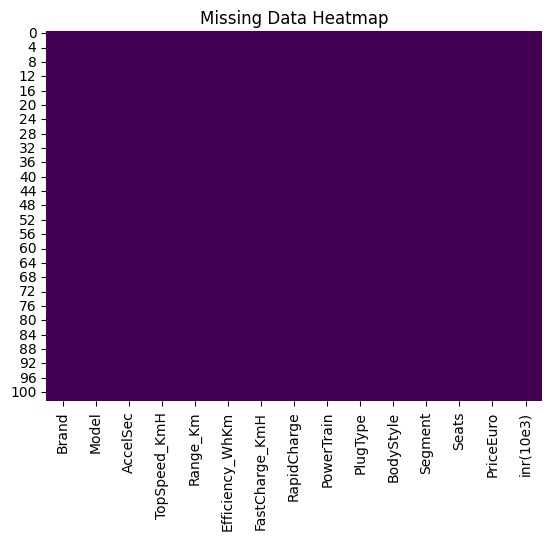

In [15]:
# Visualize missing data 
sb.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


No any missing values in the dataset it clearly shown in figure

In [16]:
## Descriptive Statistics of the dataset
data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,17888.000000


#####  Different EV brand 

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\4201111890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data, y='Brand', order=data['Brand'].value_counts().index, palette='viridis')


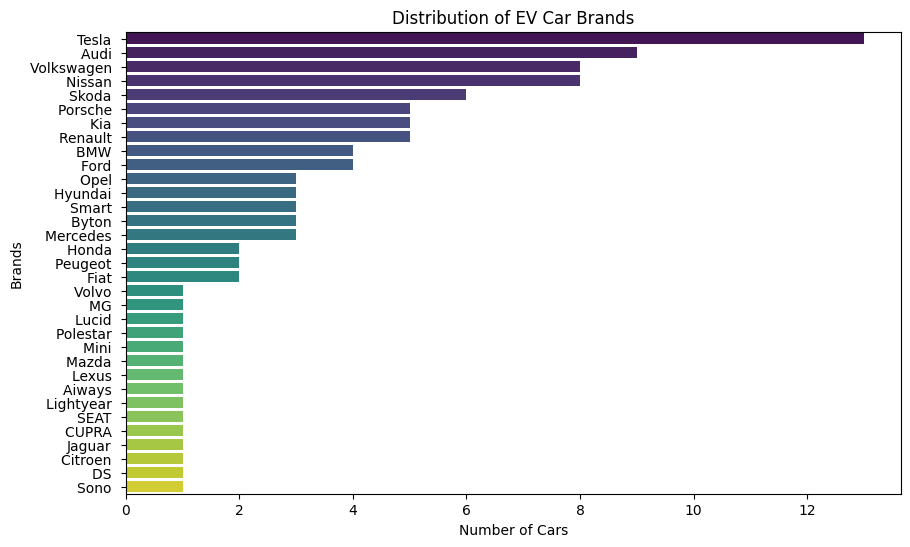

In [18]:
if 'Brand' in data.columns:
    plt.figure(figsize=(10, 6))
    sb.countplot(data=data, y='Brand', order=data['Brand'].value_counts().index, palette='viridis')
    plt.title("Distribution of EV Car Brands")
    plt.xlabel("Number of Cars")
    plt.ylabel("Brands")
    plt.show()
else:
    print("The dataset does not contain a 'brand' column.")

##### Top EV brand with numbers of different model they have

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\3276203927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')


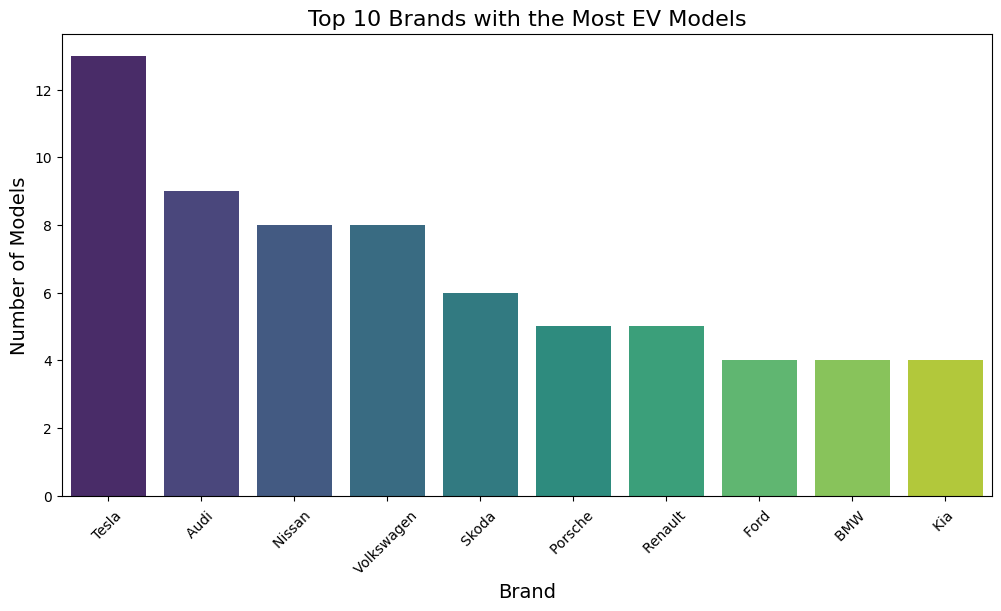

In [20]:
#
if 'Brand' in data.columns and 'Model' in data.columns:
    # Count the number of unique models per brand
    brand_model_counts = data.groupby('Brand')['Model'].nunique().sort_values(ascending=False)

    # Get the top 10 brands with the highest number of models
    top_10_brands = brand_model_counts.head(10)

    # Plot a bar chart
    plt.figure(figsize=(12, 6))
    sb.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')
    plt.title("Top 10 Brands with the Most EV Models", fontsize=16)
    plt.xlabel("Brand", fontsize=14)
    plt.ylabel("Number of Models", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The dataset does not contain both 'brand' and 'model' columns.")


##### Frequency of brands in the dataset

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\314165484.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand', y='Frequency', data=brand_counts, palette='Blues_d')


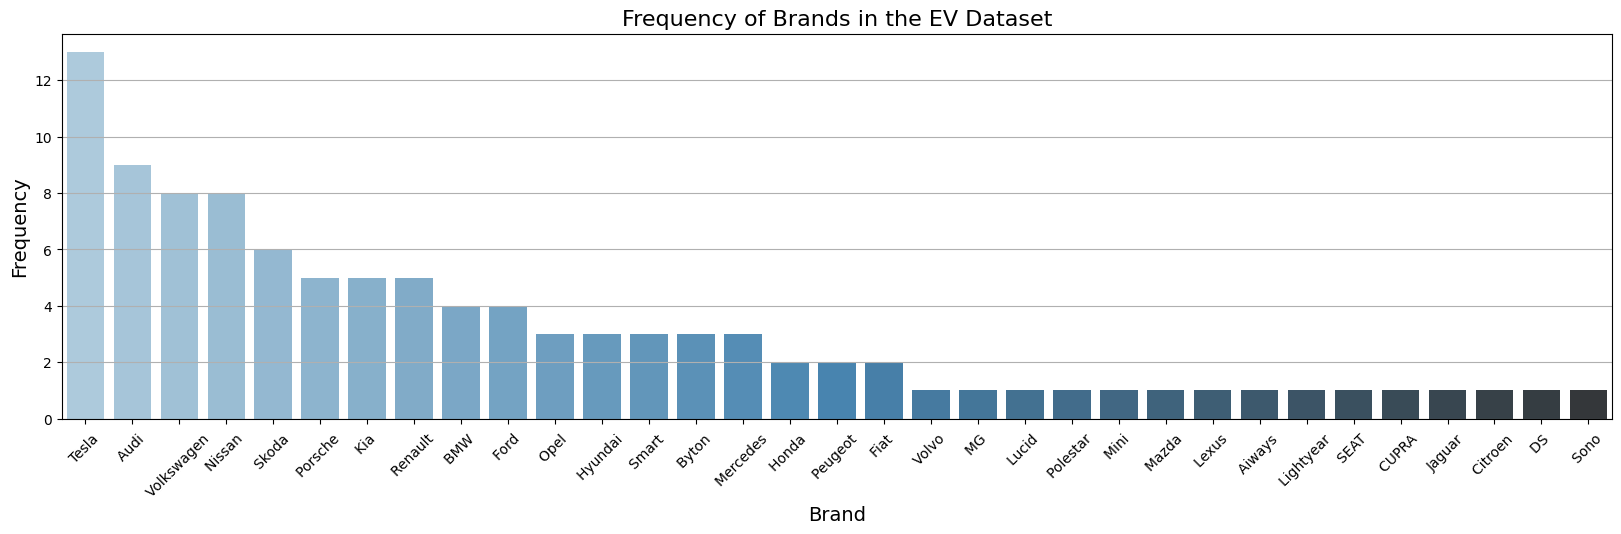

In [21]:
# Frequency of brand in the dataset
# Count the frequency of each brand and store it in a new DataFrame
brand_counts = data['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Frequency']  # Rename columns for clarity

# Plot the bar chart
plt.figure(figsize=(20, 5))
sb.barplot(x='Brand', y='Frequency', data=brand_counts, palette='Blues_d')
plt.grid(axis='y')
plt.title('Frequency of Brands in the EV Dataset', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.show()



C:\Users\amren\AppData\Local\Temp\ipykernel_10344\3991304556.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(brand_top_speed.index, rotation=45)


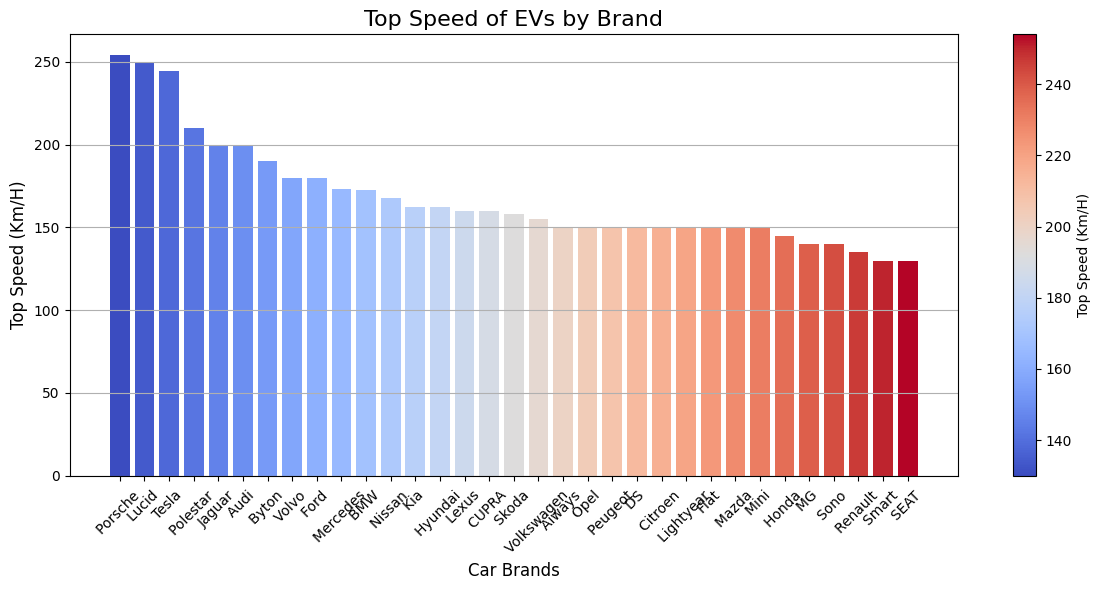

In [22]:
# Group by Brand and calculate the average TopSpeed
brand_top_speed = data.groupby('Brand')['TopSpeed_KmH'].mean().sort_values(ascending=False)

# Create a color gradient based on the TopSpeed values
colors = plt.cm.coolwarm(np.linspace(0, 1, len(brand_top_speed)))

# Plot a bar chart with color gradient
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(brand_top_speed.index, brand_top_speed.values, color=colors)

# Adding titles and labels
ax.set_title('Top Speed of EVs by Brand', fontsize=16)
ax.set_xlabel('Car Brands', fontsize=12)
ax.set_ylabel('Top Speed (Km/H)', fontsize=12)
ax.set_xticklabels(brand_top_speed.index, rotation=45)

# Adding a color bar to show the gradient
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=brand_top_speed.min(), vmax=brand_top_speed.max()))
sm.set_array([])  # This is important for the colorbar to display correctly

# Add colorbar
fig.colorbar(sm, ax=ax, label='Top Speed (Km/H)')

# Adding a grid and showing the plot
ax.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\amren\AppData\Local\Temp\ipykernel_10344\483233426.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(brand_acceleration.index, rotation=45)


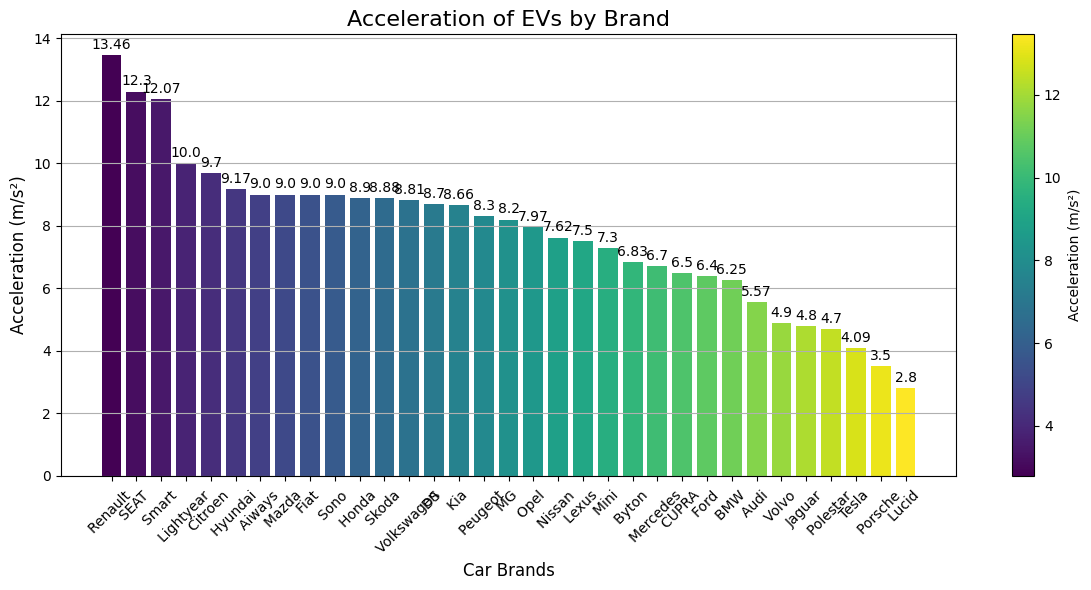

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Brand and calculate the average Acceleration
brand_acceleration = data.groupby('Brand')['AccelSec'].mean().sort_values(ascending=False)

# Create a color gradient based on the Acceleration values
colors = plt.cm.viridis(np.linspace(0, 1, len(brand_acceleration)))

# Plot a bar chart with color gradient
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(brand_acceleration.index, brand_acceleration.values, color=colors)

# Adding titles and labels
ax.set_title('Acceleration of EVs by Brand', fontsize=16)
ax.set_xlabel('Car Brands', fontsize=12)
ax.set_ylabel('Acceleration (m/s²)', fontsize=12)
ax.set_xticklabels(brand_acceleration.index, rotation=45)

# Labeling each bar with the acceleration value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Adding a color bar to show the gradient
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=brand_acceleration.min(), vmax=brand_acceleration.max()))
sm.set_array([])  # This is important for the colorbar to display correctly

# Add colorbar
fig.colorbar(sm, ax=ax, label='Acceleration (m/s²)')

# Adding a grid and showing the plot
ax.grid(axis='y')
plt.tight_layout()
plt.show()


##### Different Brands with their price

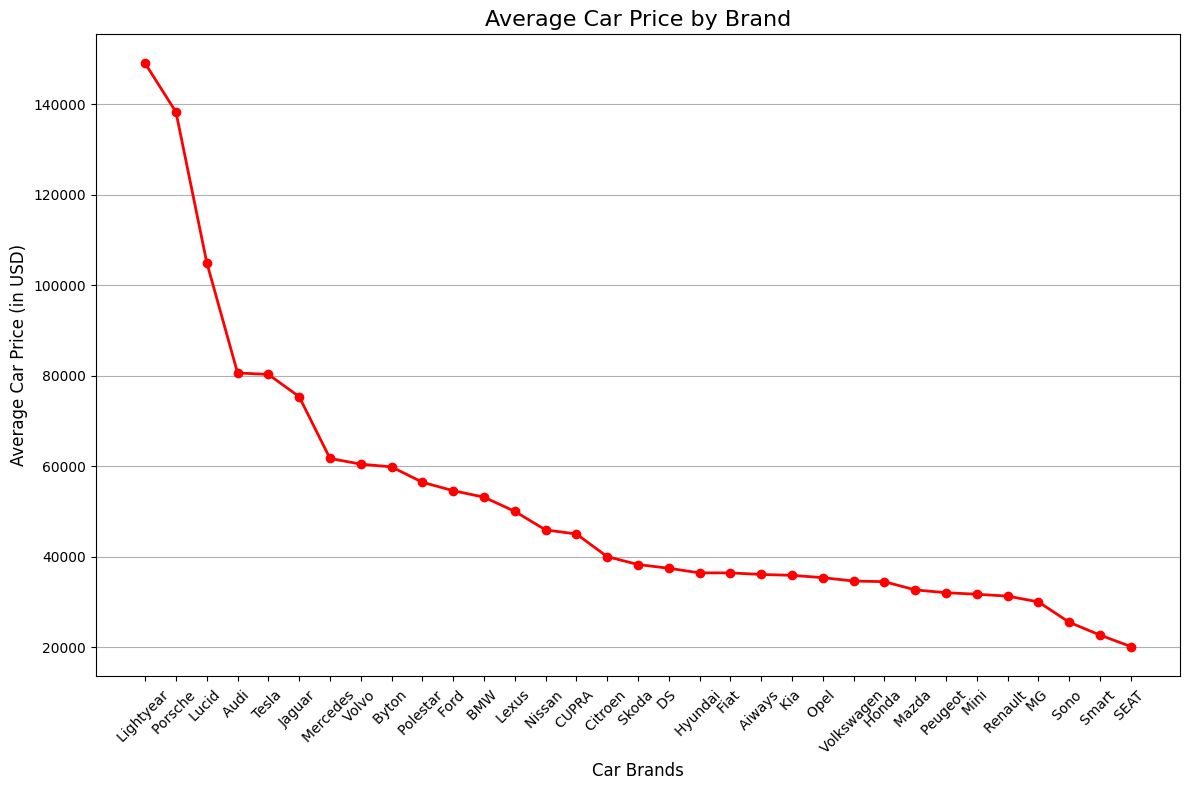

In [27]:
import matplotlib.pyplot as plt

# Group by Brand and calculate the average Price
brand_price = data.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)

# Plot the average car price for each brand
plt.figure(figsize=(12, 8))
plt.plot(brand_price.index, brand_price.values, marker='o', color='red', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Average Car Price by Brand', fontsize=16)
plt.xlabel('Car Brands', fontsize=12)
plt.ylabel('Average Car Price (in USD)', fontsize=12)

# Displaying the plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Car price by brands

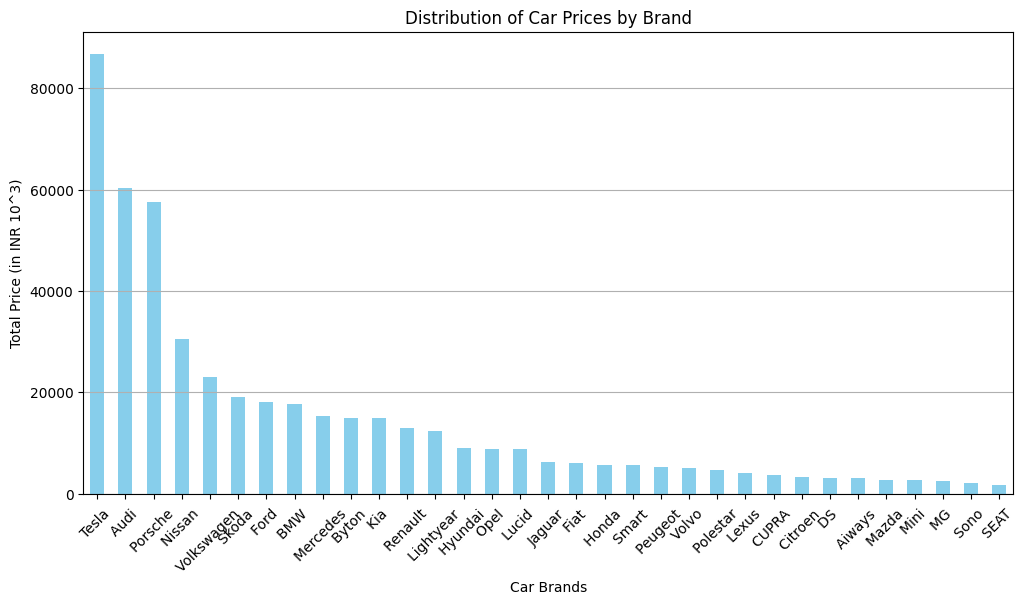

In [28]:
import matplotlib.pyplot as plt

# Group by Brand and calculate the sum of car prices
brand_price = data.groupby('Brand')['inr(10e3)'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12,6))
brand_price.plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Prices by Brand')
plt.xlabel('Car Brands')
plt.ylabel('Total Price (in INR 10^3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Range Distribution by Car Brand

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\1383481120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Brand', y='Range_Km', data=data, palette='Set3')


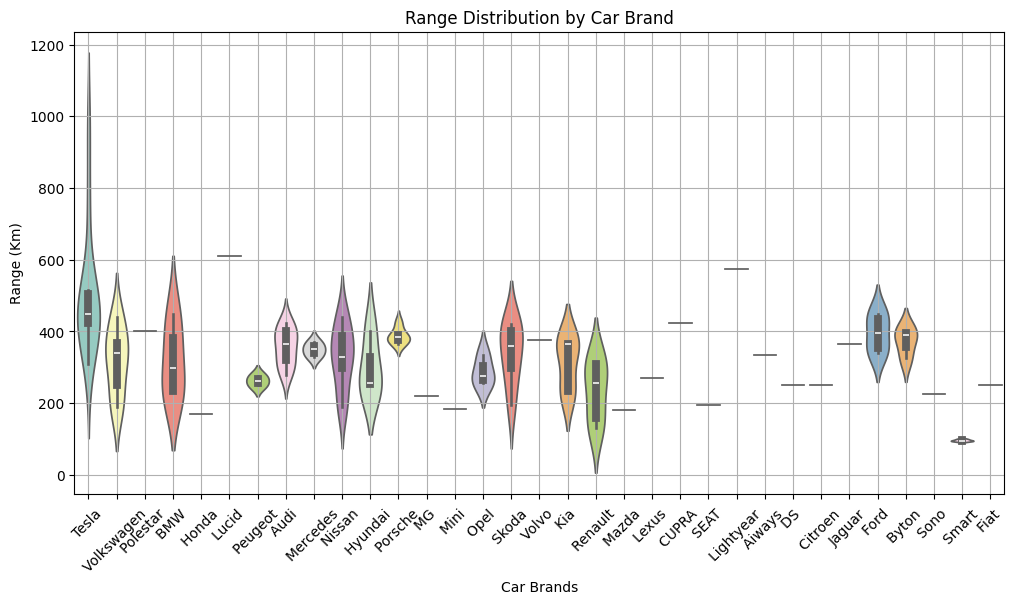

In [29]:
# Set figure size
plt.figure(figsize=(12,6))

# Create a colorful violin plot for range
sb.violinplot(x='Brand', y='Range_Km', data=data, palette='Set3')

# Customize the plot
plt.title('Range Distribution by Car Brand')
plt.xlabel('Car Brands')
plt.ylabel('Range (Km)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


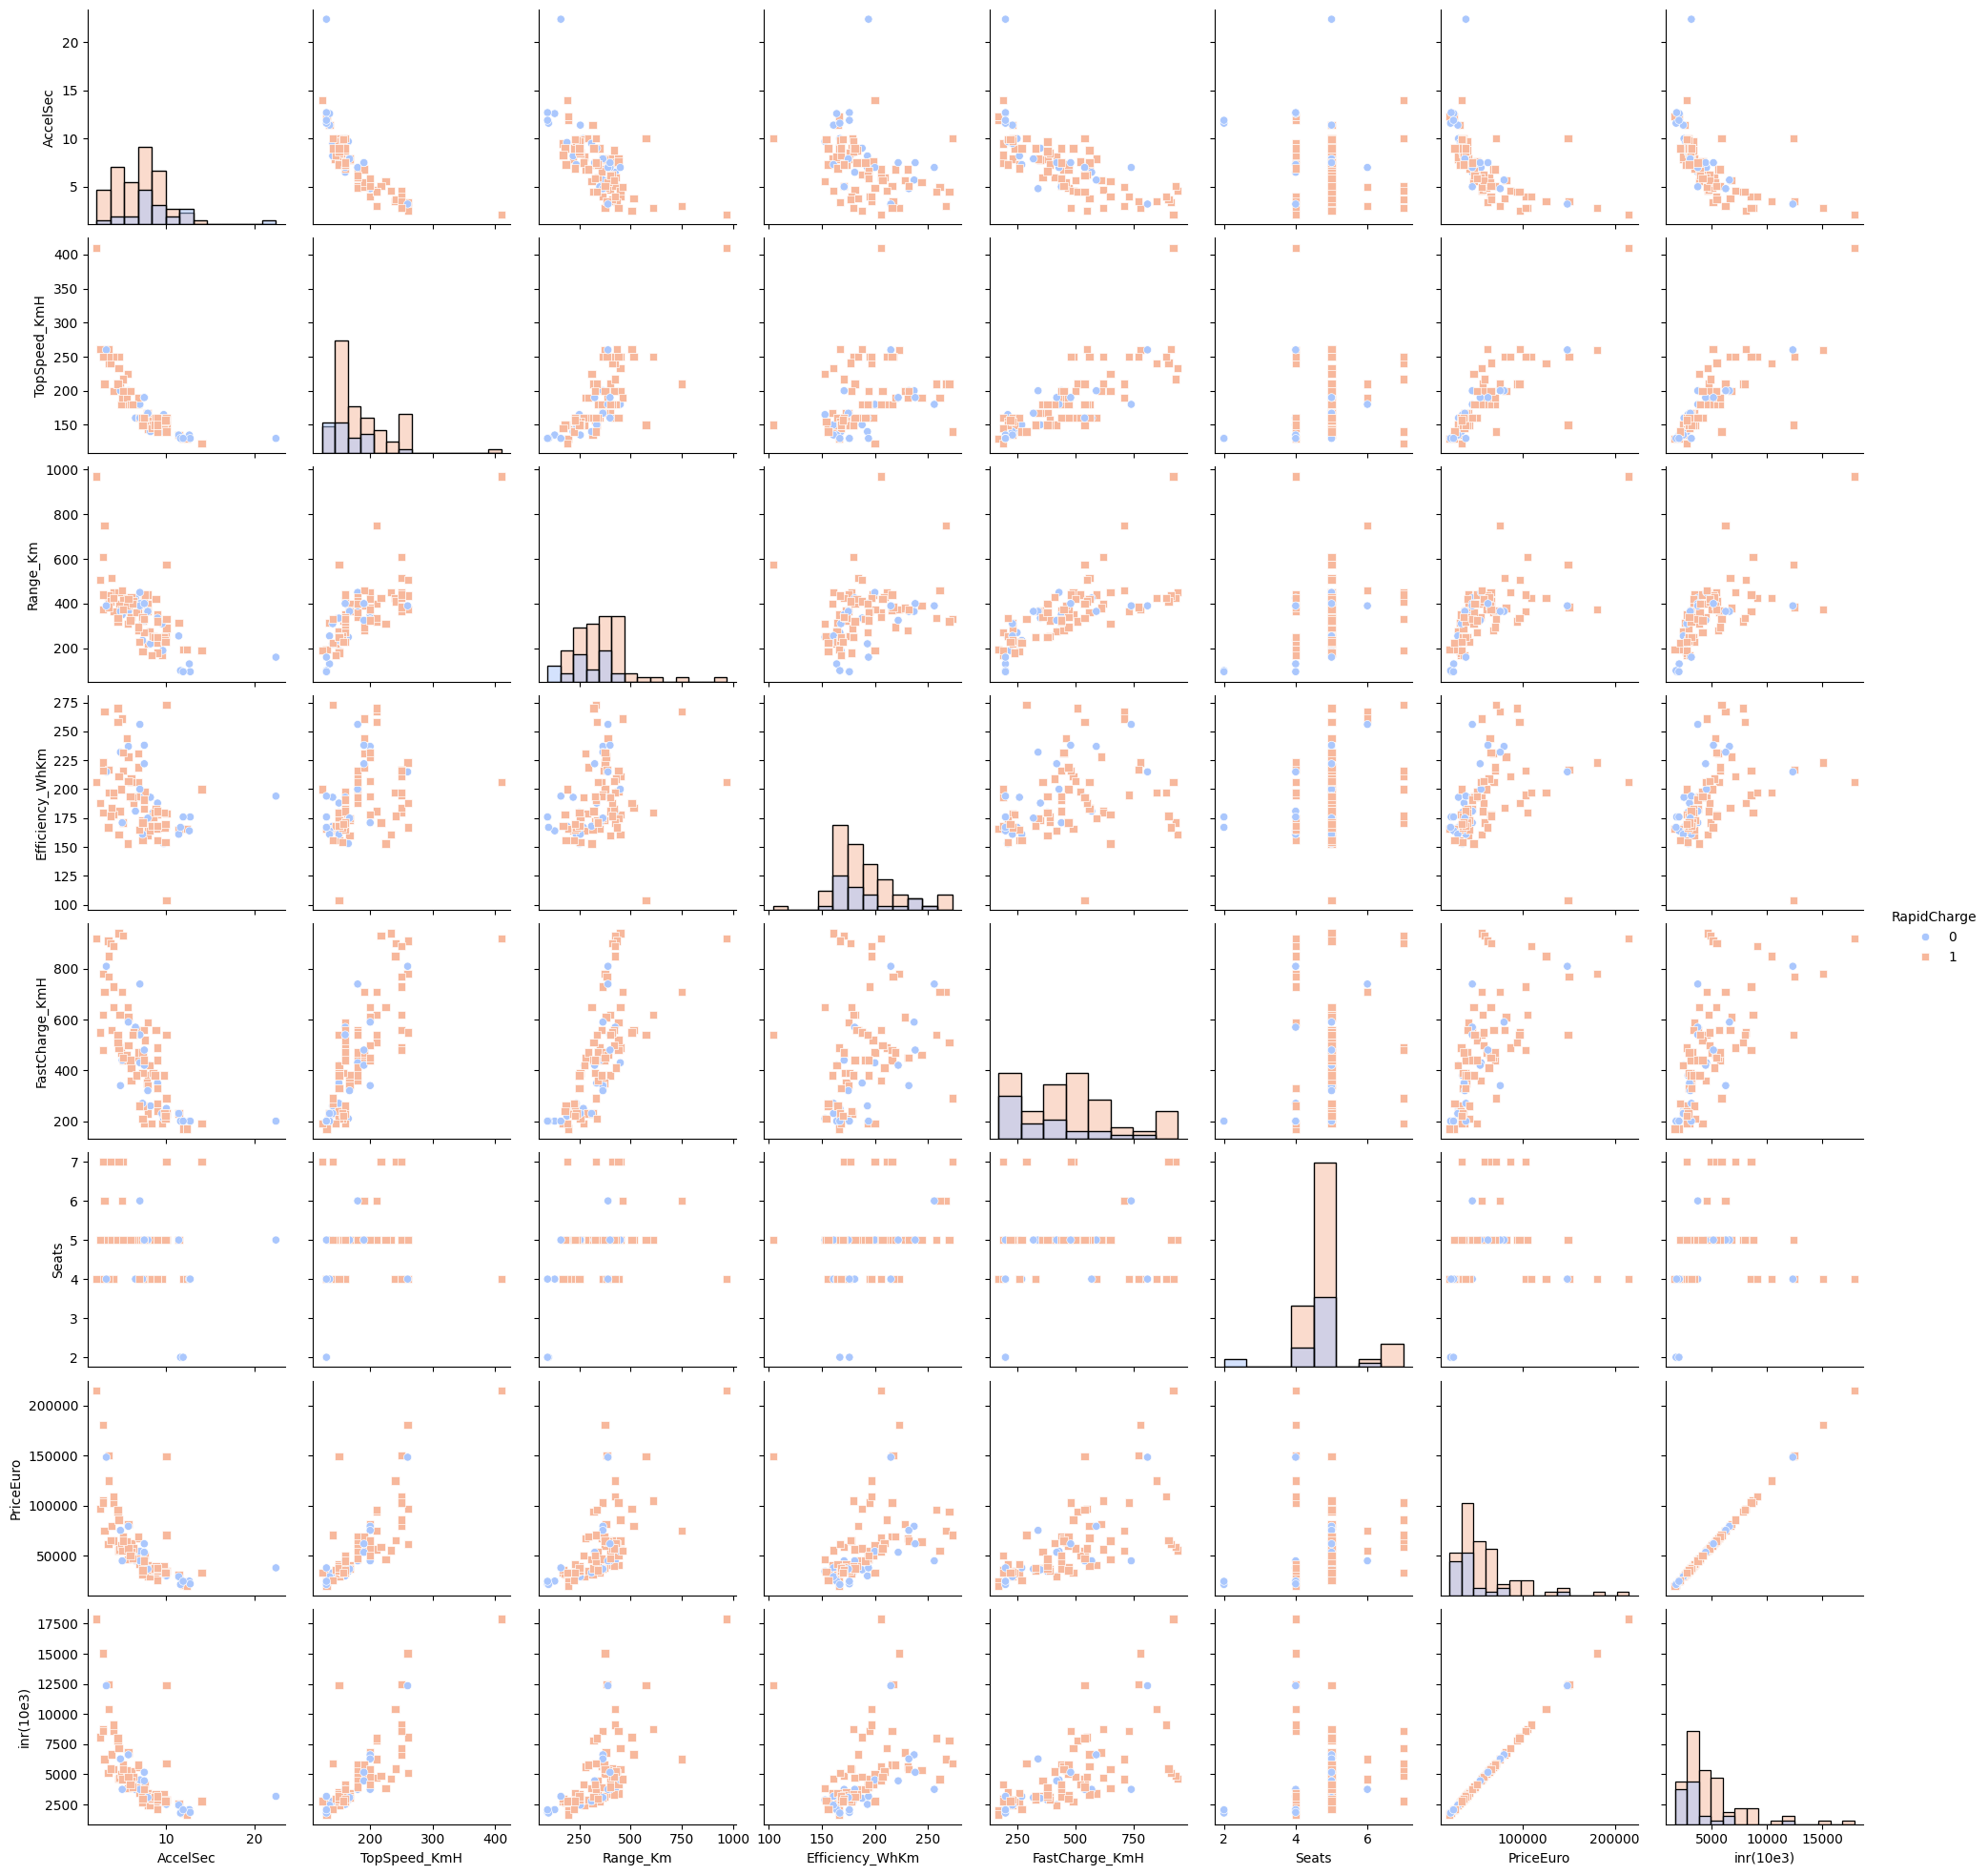

In [30]:

# Pairplot based on Rapid Charger presence
sb.pairplot(data, hue='RapidCharge', diag_kind='hist', markers=["o", "s"], palette='coolwarm')

# Show the plot
plt.show()


##### Heatmap to visualize correleation in data

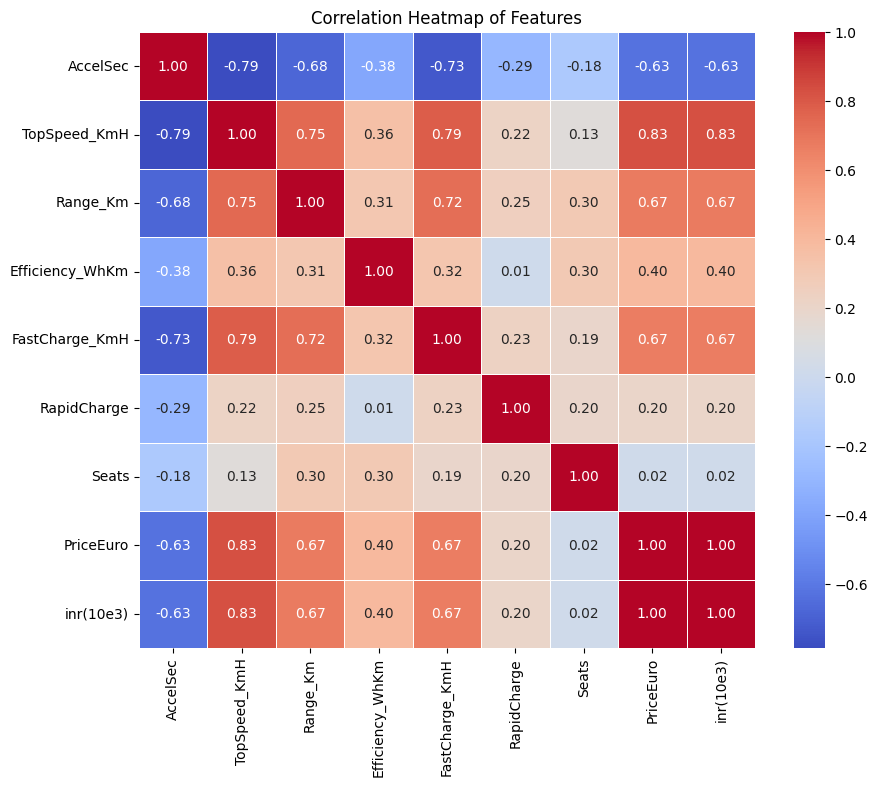

In [31]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Set plot title
plt.title("Correlation Heatmap of Features")

# Show the plot
plt.show()


In [32]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


#### Some Comparioson in the dataset

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\3443551487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand', y='Efficiency_WhKm', data=data, palette='hls')


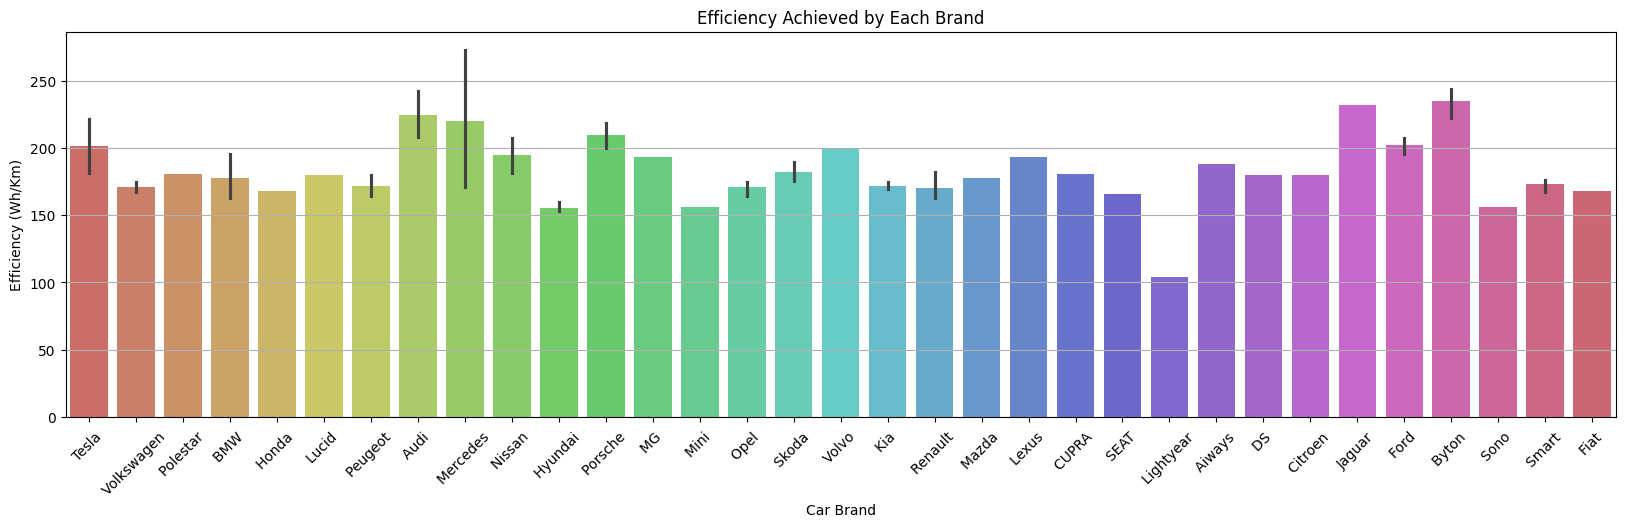

In [33]:
# Create the figure with the desired size
plt.figure(figsize=(20, 5))

# Create a barplot comparing efficiency across brands
sb.barplot(x='Brand', y='Efficiency_WhKm', data=data, palette='hls')

# Add grid lines to the y-axis for better readability
plt.grid(axis='y')

# Set the plot's title and axis labels
plt.title('Efficiency Achieved by Each Brand')
plt.xlabel('Car Brand')
plt.ylabel('Efficiency (Wh/Km)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\amren\AppData\Local\Temp\ipykernel_10344\2913994182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Brand', y='Seats', data=data, palette='husl')


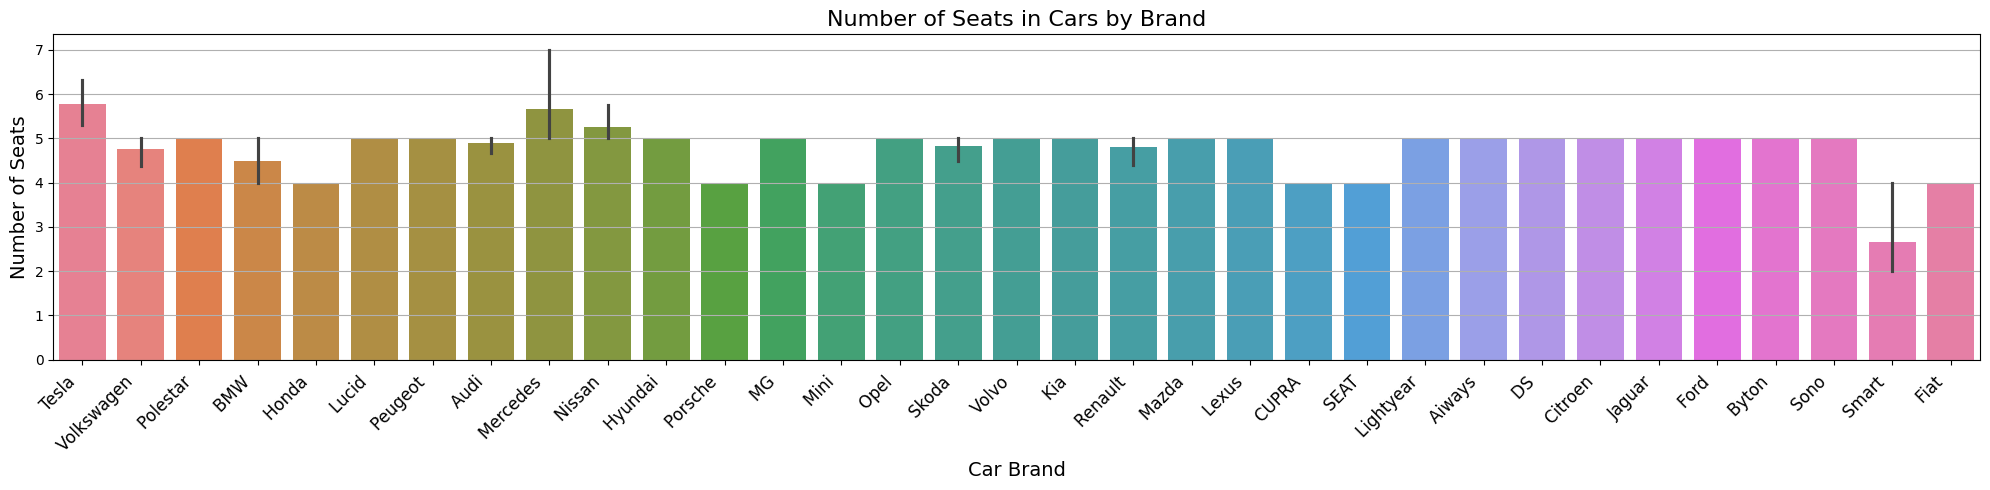

In [34]:
# Create the figure with the desired size
plt.figure(figsize=(20, 5))

# Create a barplot comparing the number of seats across brands
sb.barplot(x='Brand', y='Seats', data=data, palette='husl')
plt.grid(axis='y')

# Set the plot's title and axis labels
plt.title('Number of Seats in Cars by Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Number of Seats', fontsize=14)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()  
plt.show()


Text(0.5, 1.0, 'Plug Type')

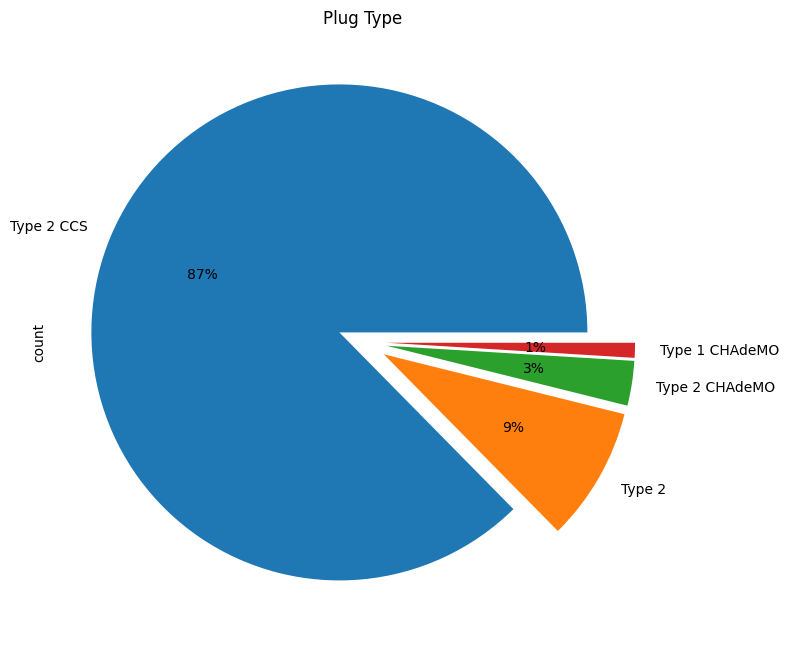

In [35]:
# Types of plug used for charging
data['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Body Style')

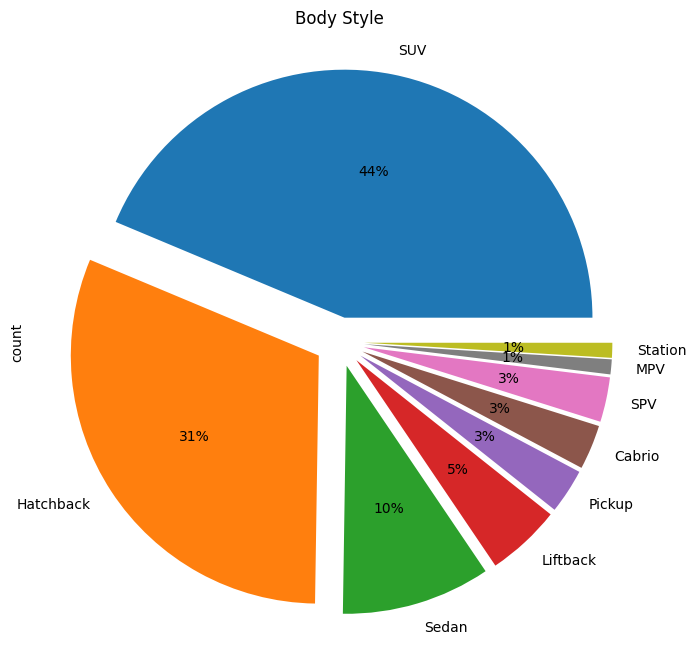

In [36]:
# Cars and their body style
data['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Seats')

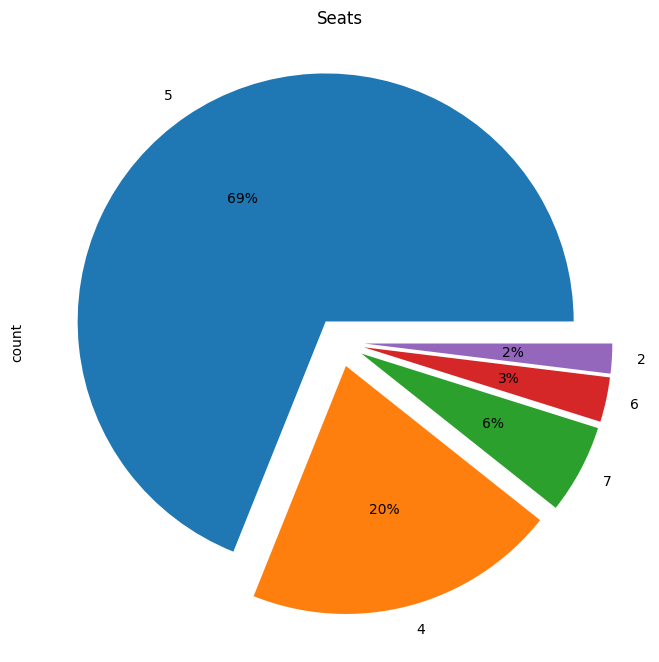

In [37]:
## Number of seats in cars
data['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
#visualize
plt.title('Seats')

###### We cleary see that majority of the cars have 5 seats

In [38]:
df3= data[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= data[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= data[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [39]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

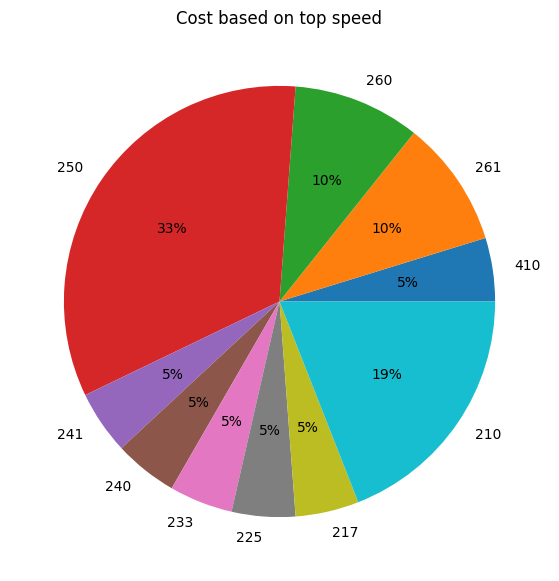

In [40]:
## Cost based on the top speed 
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

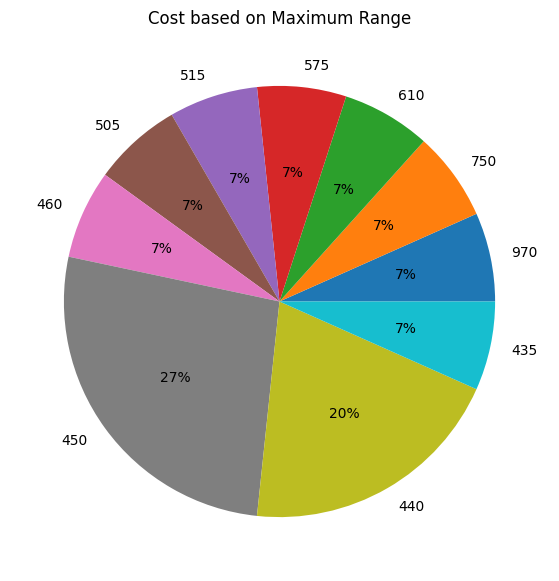

In [41]:
# Visualization of Cost based on Maximum Range
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

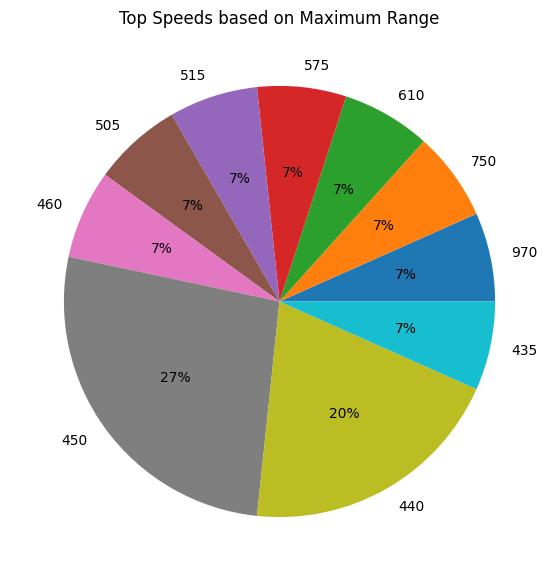

In [42]:
# Visualization of Top Speeds based on Maximum Range
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

### Model Building

#### Regression

In [51]:
#Importing some important Libraries
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
import statsmodels.api as sm


In [46]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [47]:
# Now seprate the independent and dependent variables separately for model building
data['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=data[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=data['PriceEuro']

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\2871557808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
C:\Users\amren\AppData\Local\Temp\ipykernel_10344\2871557808.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [52]:
#For the model's flexibility, leading to better fitting in most cases.
x= sm.add_constant(x)
results = sm.OLS(y,x) 

##### Fitting the model and Summarizing 

In [53]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.57e-24
Time:                        16:48:55   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [55]:
#Model fitting
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [56]:
#R-squared value
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232664


##### Around 78% of the dependant variable has been explained by the independant variables

In [58]:
y1=data[['RapidCharge']]
x1=data[['PriceEuro']]

In [59]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [61]:
#Fitting the Logistic Model
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

c:\Users\amren\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
#Confusion matrix for the regression
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]])

### Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

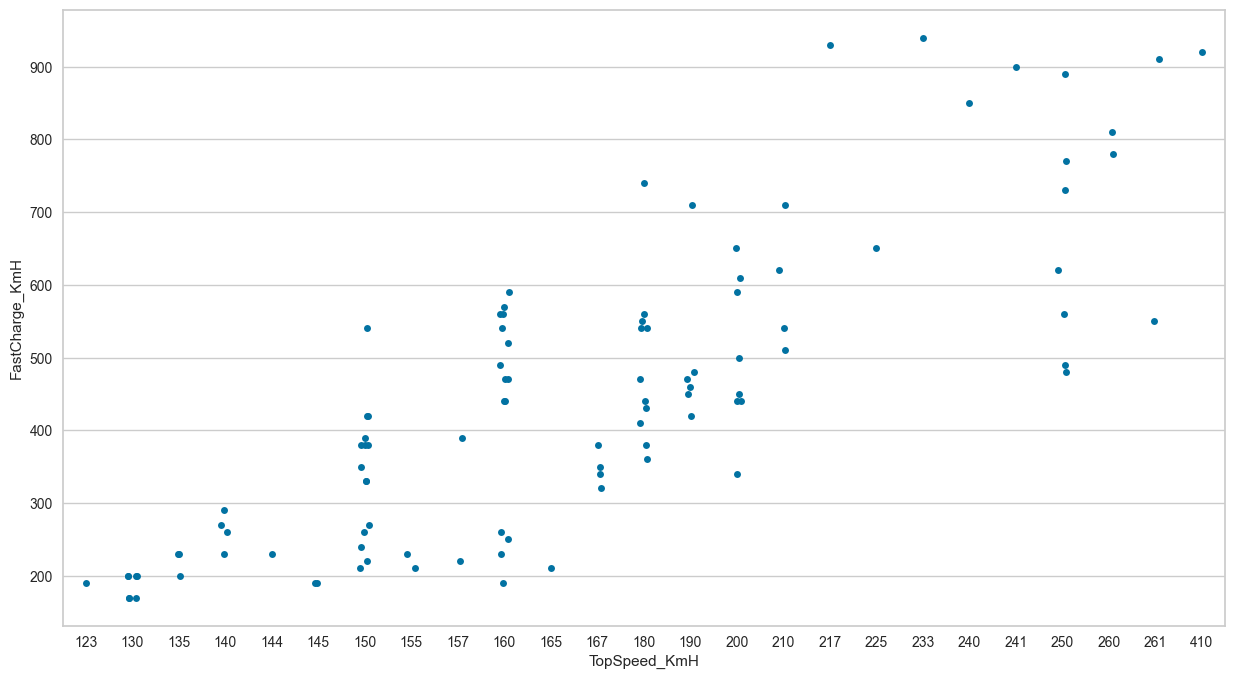

In [63]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=data, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

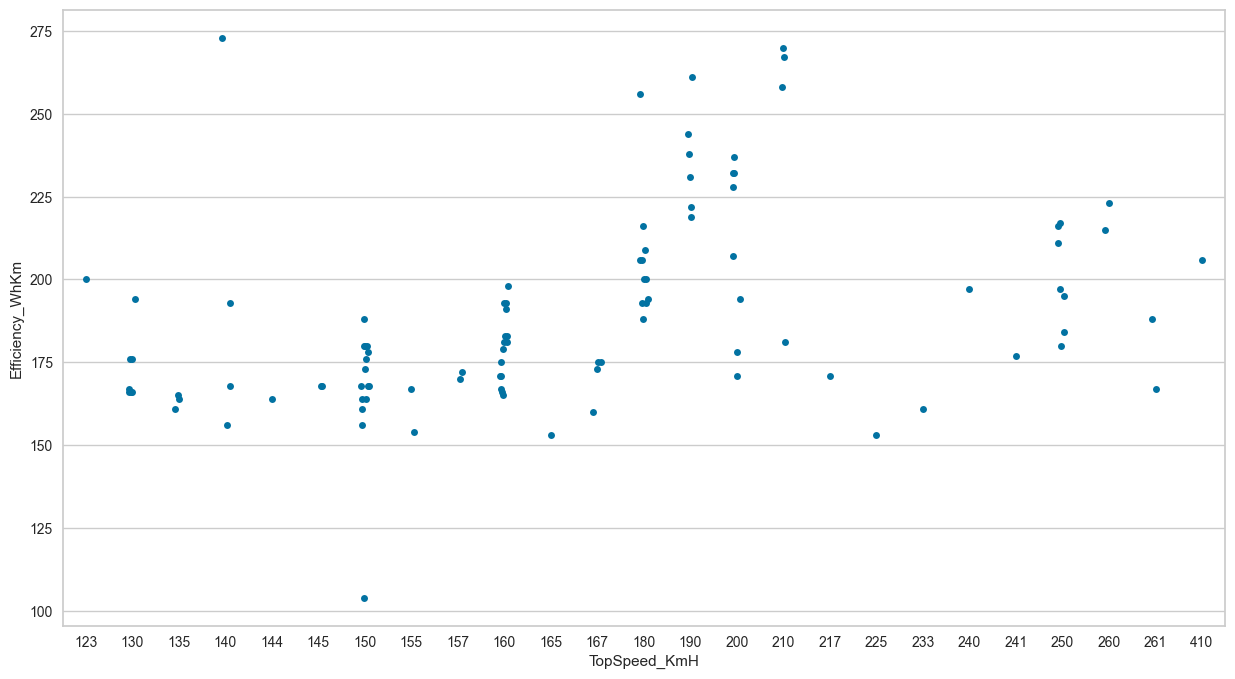

In [64]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=data, jitter=True)

In [66]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [67]:
#Now apply the Principal Component Analysis
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,0.396662
1,-2.322483,-0.345449,-0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,0.181867
2,1.587851,0.008899,0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,0.202775
3,0.291018,-0.000150,0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,-0.261663
4,-2.602679,-0.626489,0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,0.049904
...,...,...,...,...,...,...,...,...,...
98,-0.297170,0.446713,0.463601,0.102542,-0.346005,-0.100457,0.031080,0.202253,-0.145390
99,2.335018,0.630747,-0.985883,1.560112,-0.817327,-0.121906,0.164115,-0.255651,-0.141023
100,0.780642,0.426821,0.298636,0.708598,0.481728,-0.540071,-0.139753,-0.048733,0.367509
101,1.540920,0.698754,-0.422384,1.094921,-0.298113,-0.307992,-0.363230,0.127251,0.190397


In [68]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,0.396662
1,-2.322483,-0.345449,-0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,0.181867
2,1.587851,0.008899,0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,0.202775


In [70]:
# correlation coefficient between original variables and the component

# Example: pca = PCA(n_components=3).fit(some_data)

loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
print(loadings_df)


               PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
PC1      -0.396410  0.086150 -0.064757  0.058253  0.144548  0.676910   
PC2       0.421973 -0.216762 -0.002272 -0.068523  0.038208  0.045212   
PC3       0.238316  0.330919 -0.571780  0.380475 -0.575143  0.024863   
PC4       0.394519 -0.138428  0.047650 -0.296483 -0.092366 -0.237914   
Pc5       0.157195  0.269920  0.803300  0.395300 -0.292581  0.086978   
PC6       0.389544 -0.024746  0.076295 -0.387135 -0.032841  0.364461   
PC7       0.140425  0.801307 -0.019535 -0.428983  0.165256  0.086668   
PC8       0.389779 -0.262265 -0.073787  0.179862  0.043293  0.558706   
PC9       0.322888  0.180494 -0.098293  0.486554  0.722814 -0.149888   

               PC7       PC8       PC9  
variable                                
PC1       0.412498  0.270655  0.324562  
PC2       0.037576 -0.413810  0.770777  
PC3       0.004703  0.144167  0.098954  
PC

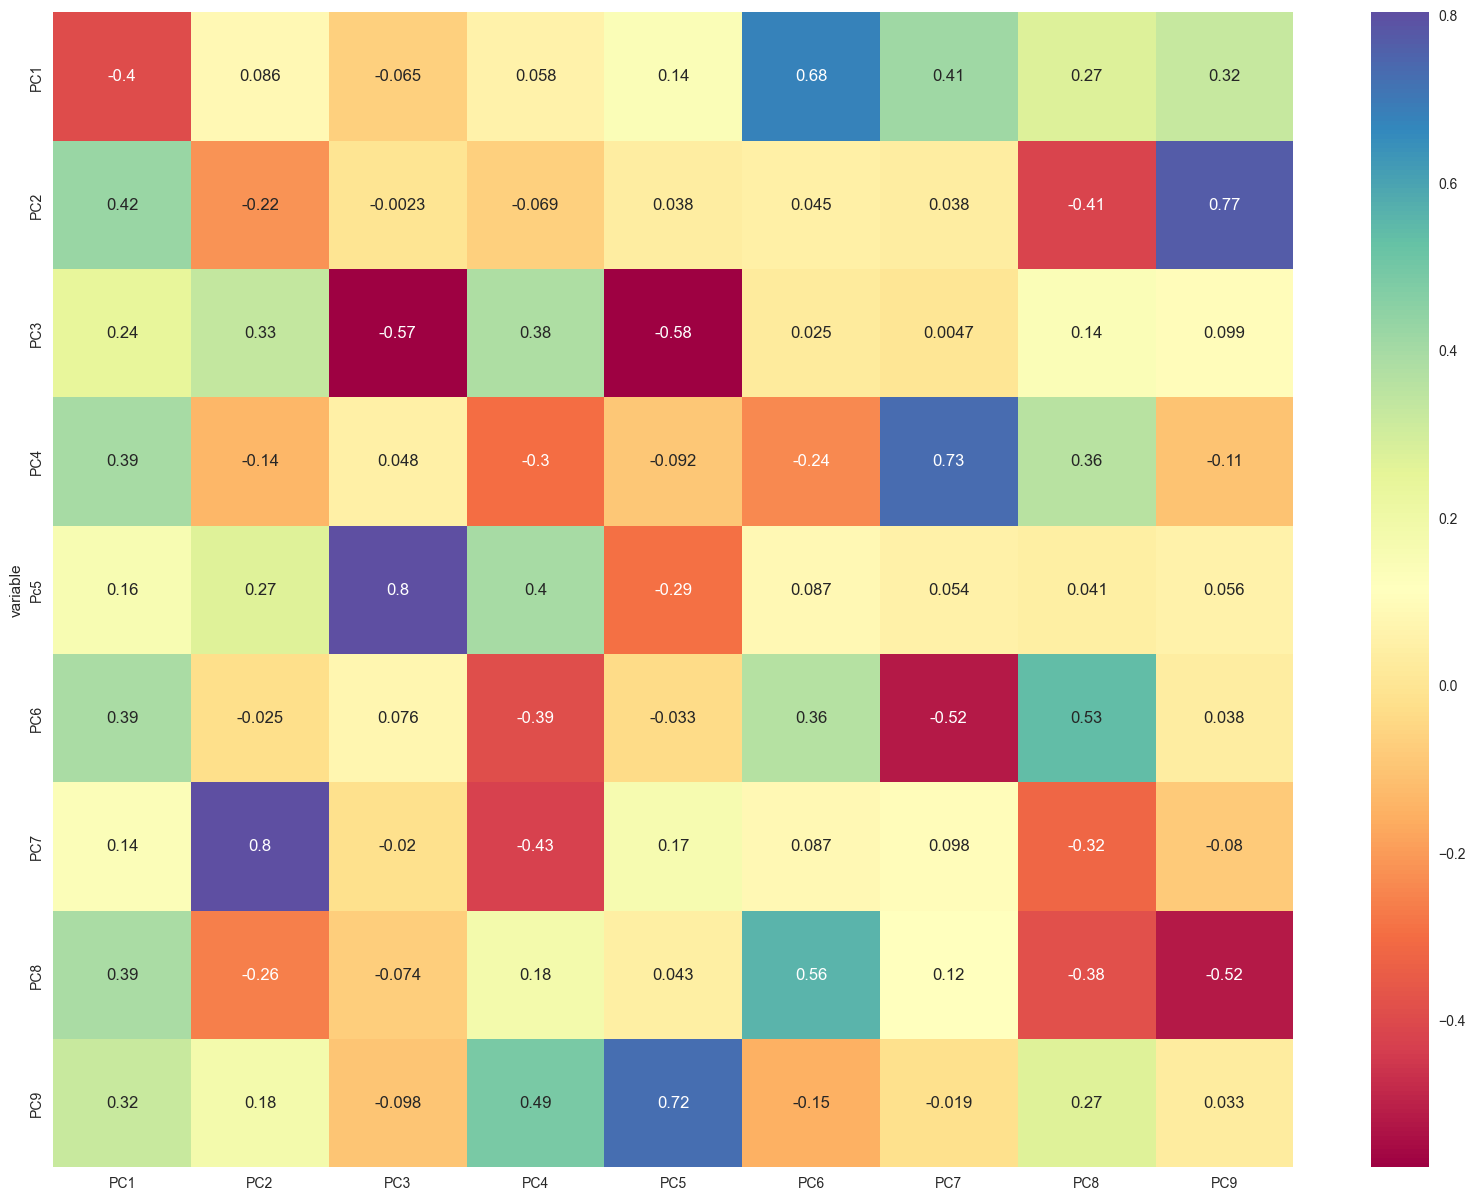

In [71]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

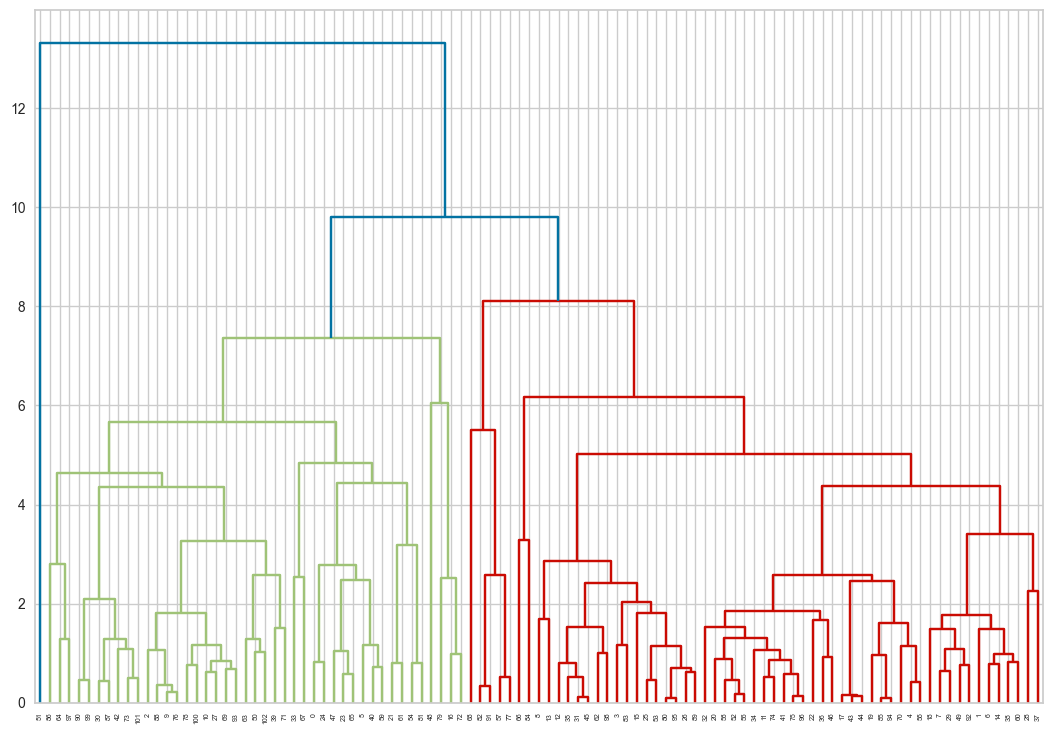

In [72]:
#perform hierarchical clustering and visualize the resulting dendrogram.
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

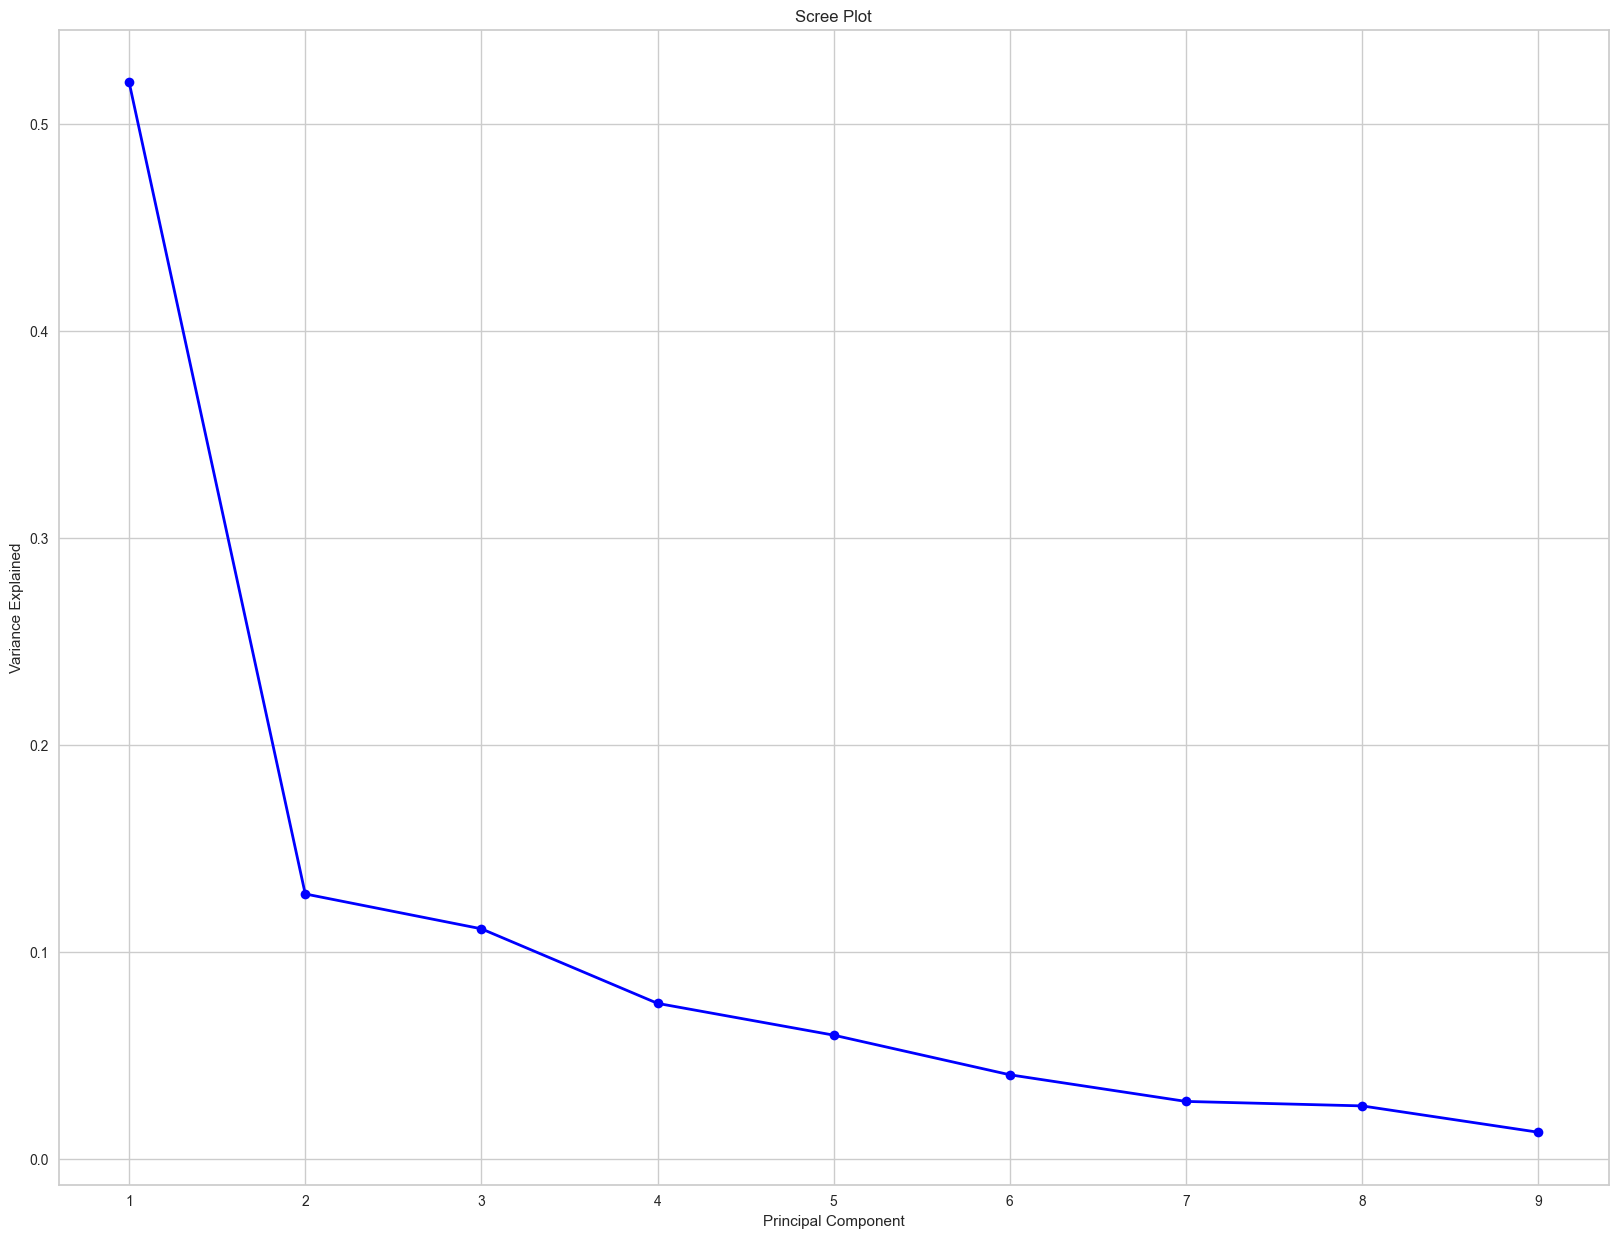

In [73]:
# Now plot the Scree Plot. 
# It provides insights into the amount of variance explained by each principal component and helps decide the optimal number of components to retain.
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

c:\Users\amren\anaconda3\envs\pytorch_env\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\amren\anaconda3\envs\pytorch_env\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


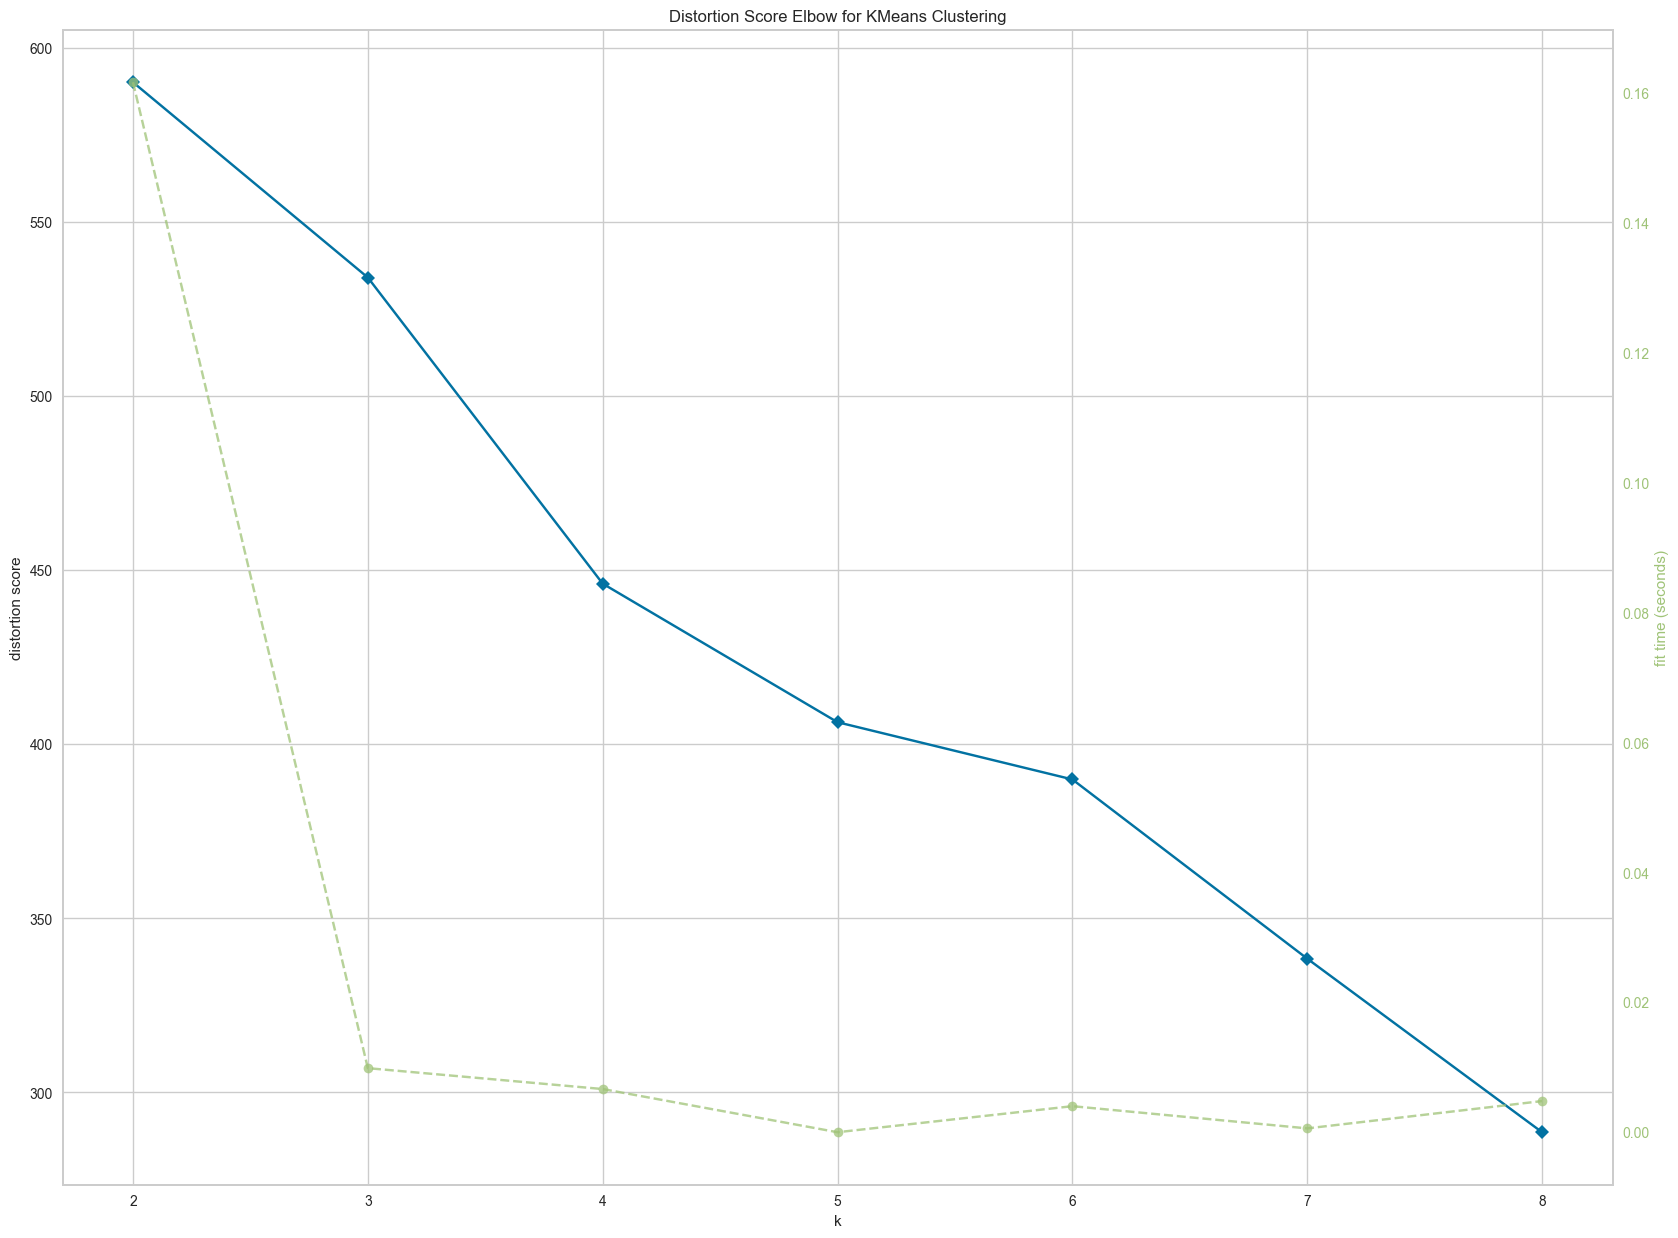

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Now find the optimal number of clusters for K-Means clustering using the Elbow Method,
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

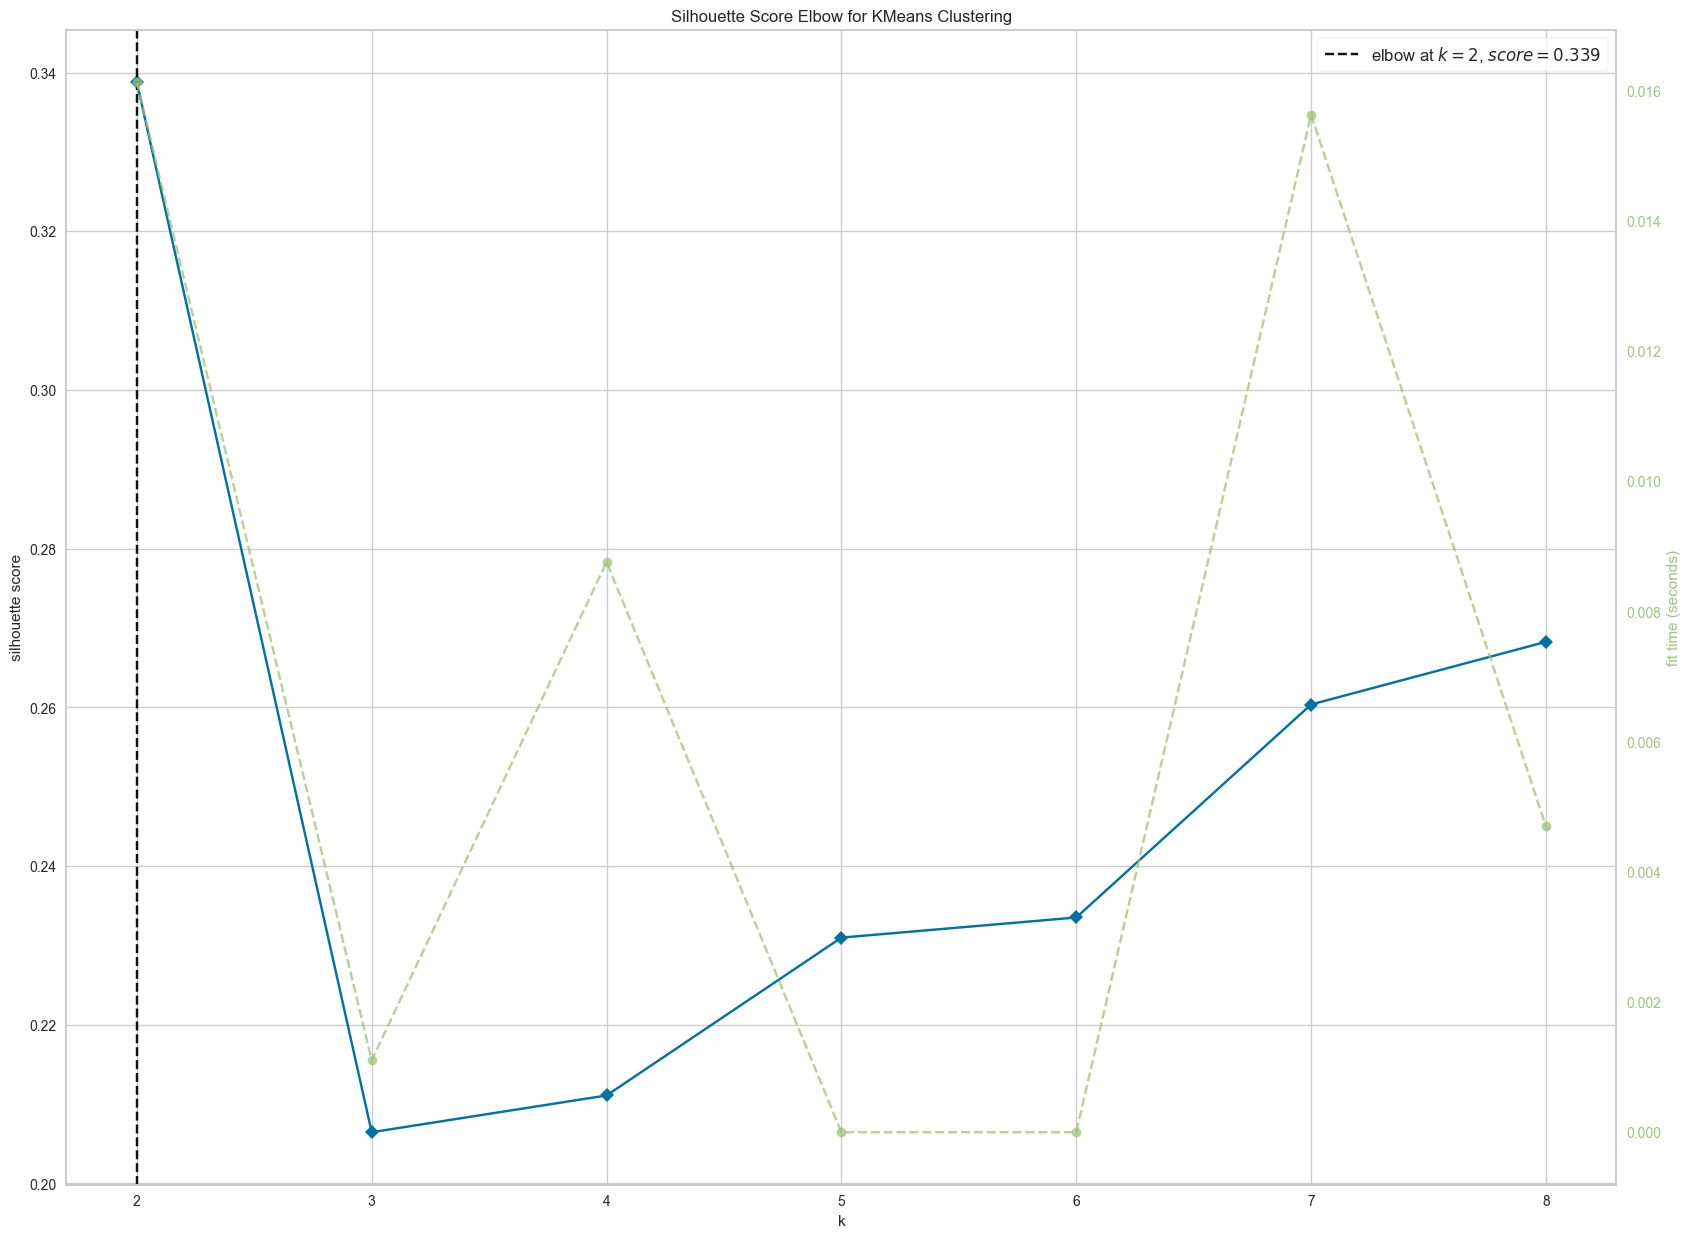

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
#performs K-Means clustering and uses the Silhouette Score as a metric 
#to determine the optimal number of clusters via the Elbow Method, 
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

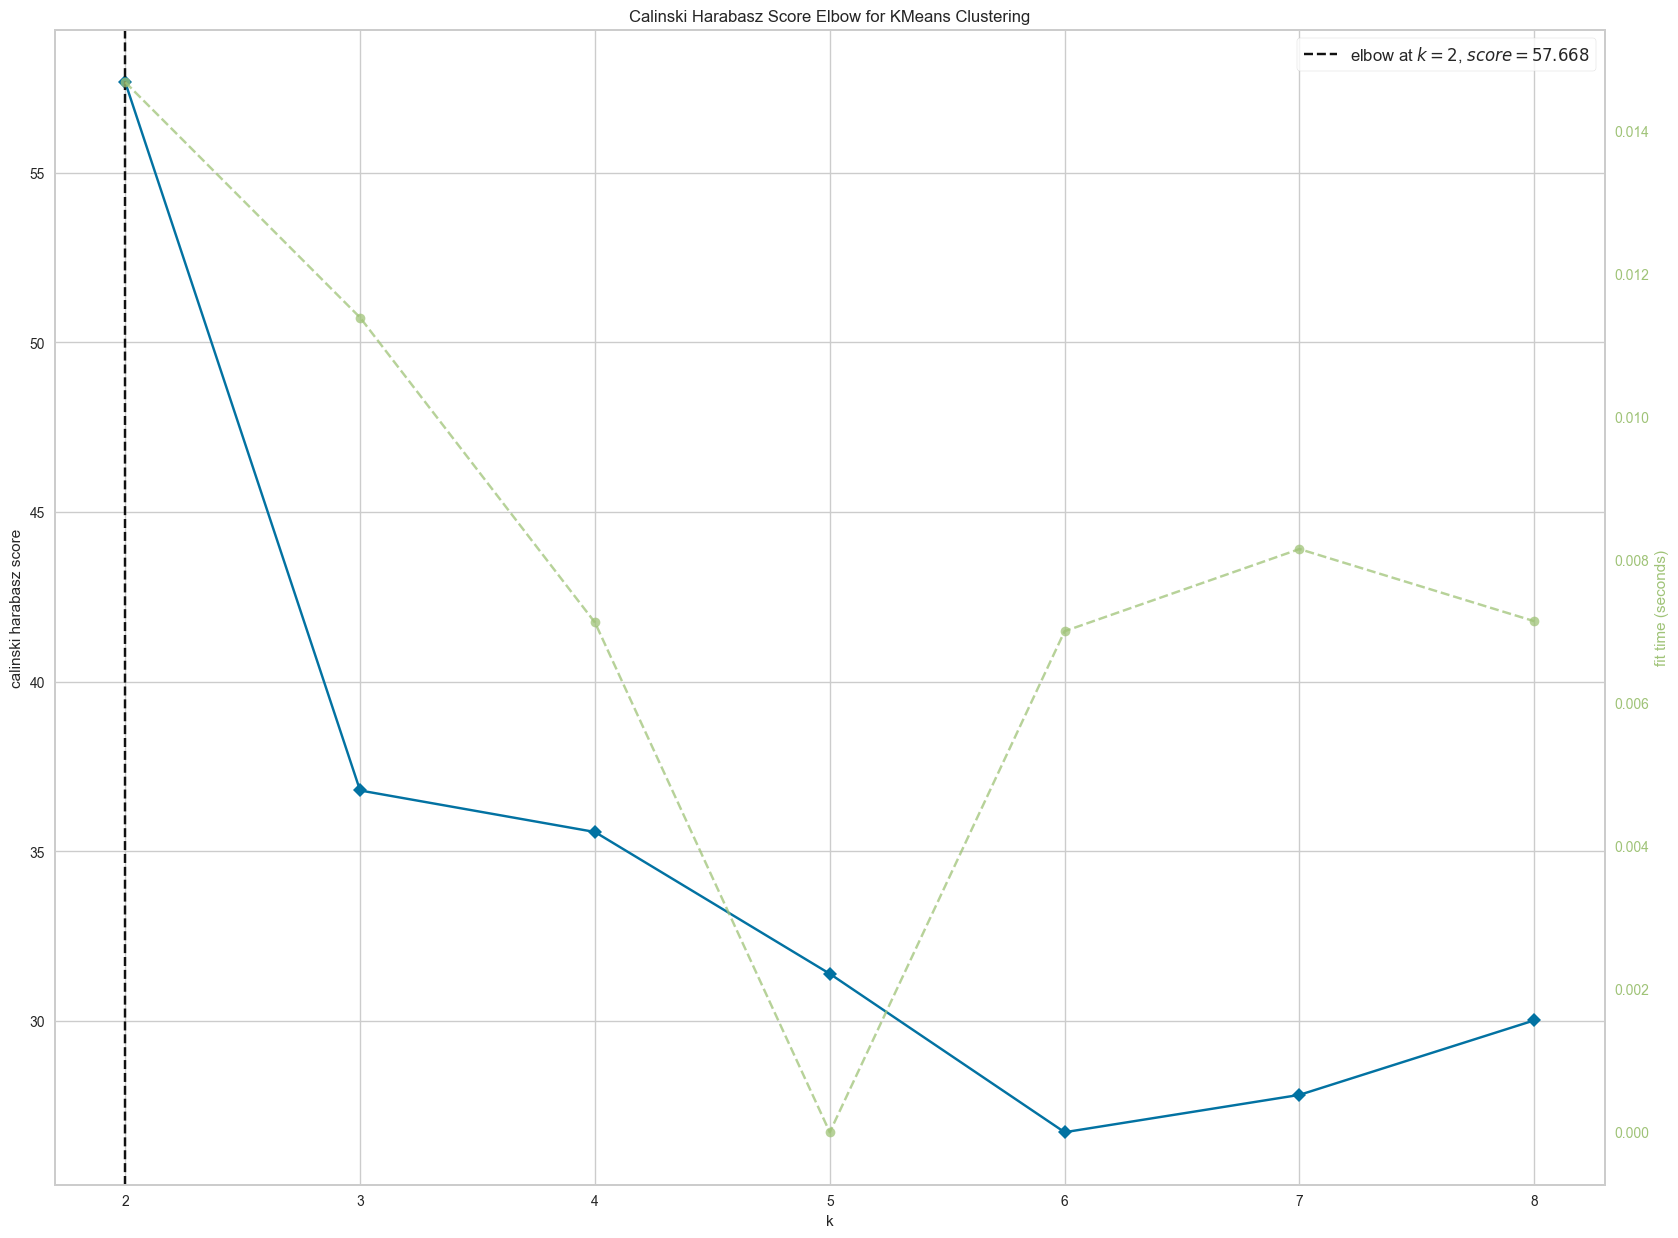

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [76]:
#Now uses the Calinski-Harabasz Index to determine the optimal number of clusters for K-Means clustering.
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [77]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
data['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 0 3 0 0 1 0 0 0 3 3 0 0 3 0 0 1 0 0 0 0 3 0 1 1 0 0 3 0 0 3 0 0 3 0 0 0
 0 0 3 1 0 3 0 0 0 0 1 1 0 3 2 0 0 3 0 0 0 0 1 0 3 3 3 0 1 0 3 0 3 0 3 1 3
 0 0 3 0 3 1 0 3 0 0 3 0 3 3 3 0 3 0 0 3 0 0 0 0 0 3 3 3 3]
463.1033440377727
4
[[-1.57067991e+00 -1.06925377e-01  1.63395848e-01 -1.46544602e-01
  -9.42461134e-02  5.43811866e-02 -2.86421604e-02 -5.17323548e-02
   1.37900973e-02]
 [ 2.98955626e+00 -1.21929583e+00  3.69655236e-01  1.81740671e-01
   4.51221030e-01  6.54435834e-02  3.44267593e-01 -9.94475742e-02
  -1.52083918e-01]
 [ 8.07581872e+00 -3.33743472e+00  3.07751898e-01 -8.18888160e-01
  -1.36464768e-01  2.74877364e+00 -9.85254173e-01 -1.92669752e-01
   1.26430725e+00]
 [ 1.47340441e+00  7.55333018e-01 -4.44392935e-01  2.23049594e-01
   5.87771832e-03 -2.09006421e-01 -4.63972387e-02  1.37078663e-01
  -7.47268365e-03]]


In [78]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({np.int32(0): 58, np.int32(3): 32, np.int32(1): 12, np.int32(2): 1})

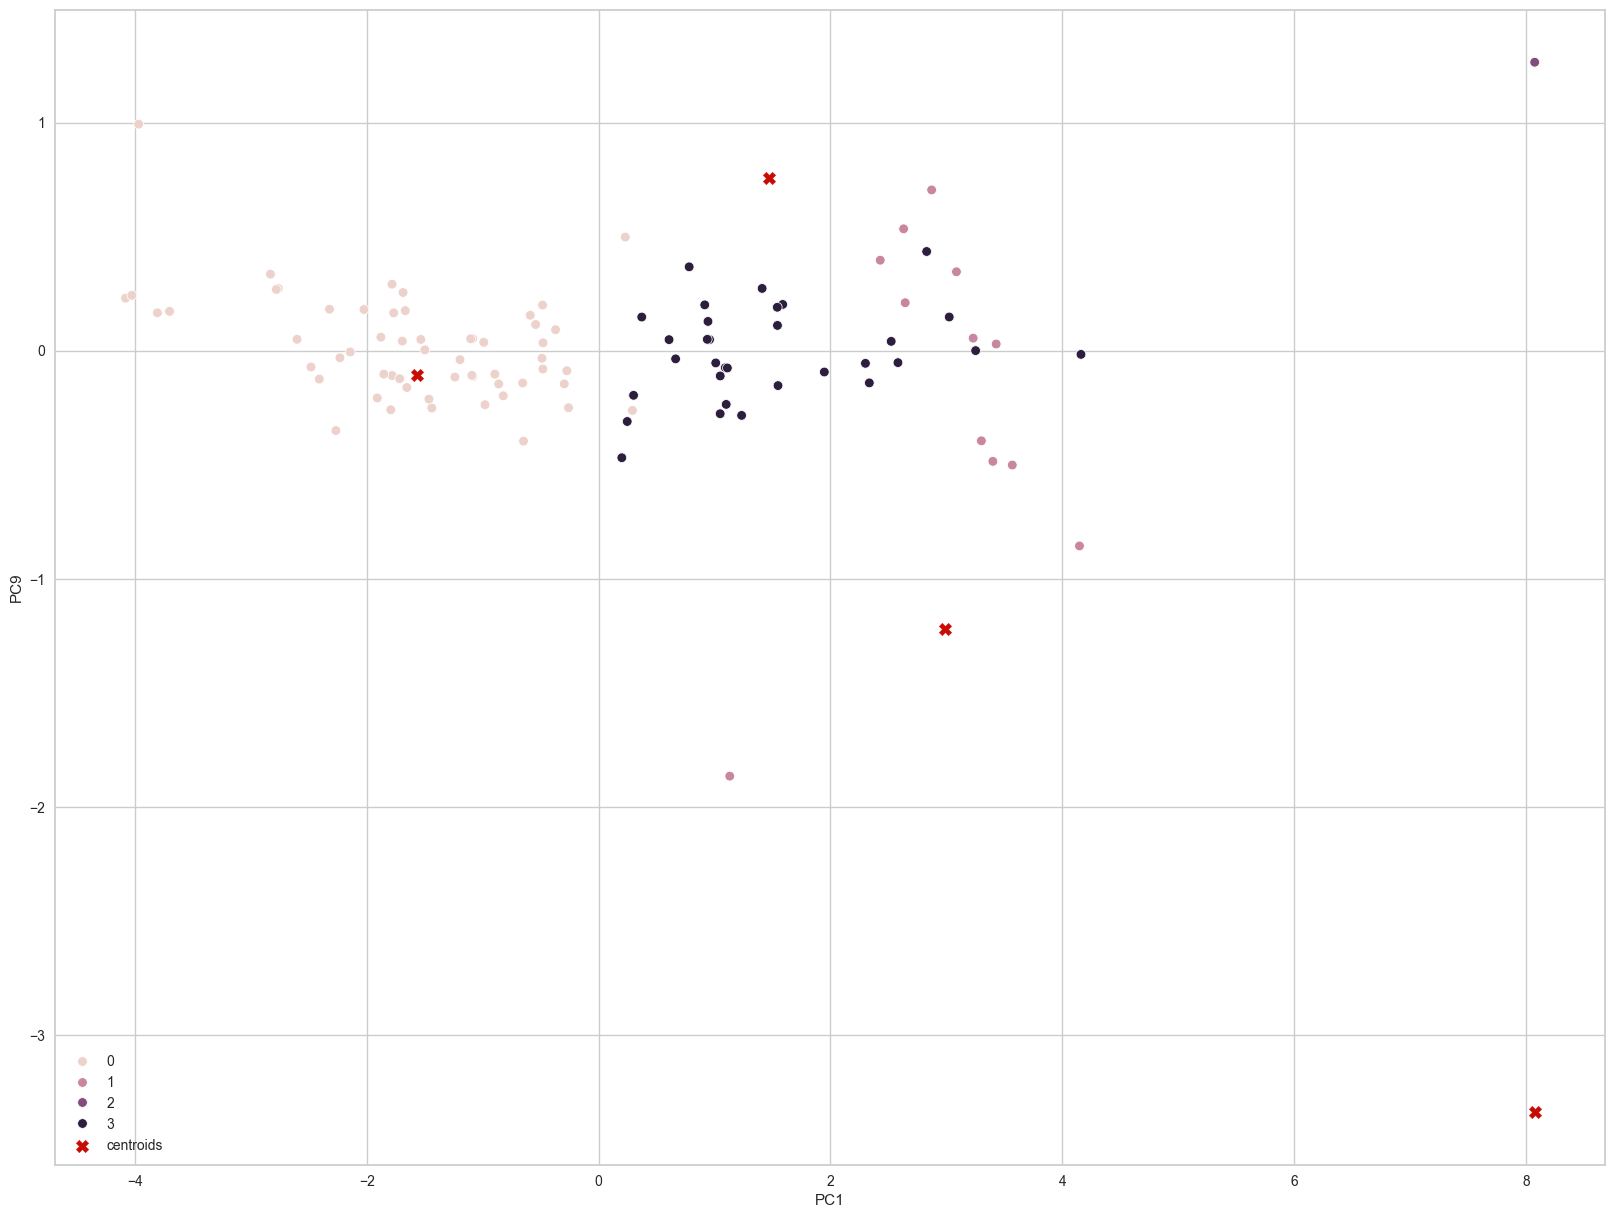

In [79]:
# Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

#### Now Apply regression for data2


In [80]:
#### Now Apply regression for data2
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=data['inr(10e3)']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [82]:
print(lm.intercept_)

4643.522050485437


In [83]:
lm.coef_

array([ 1101.5872075 ,  -741.20904198,  -208.53617452,   508.32245827,
         122.35330123,  1579.00685826,   333.61147115, -1079.99511501,
       -1461.7226913 ])

In [84]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [85]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1101.587208
PC2,-741.209042
PC3,-208.536175
PC4,508.322458
Pc5,122.353301
PC6,1579.006858
PC7,333.611471
PC8,-1079.995115
PC9,-1461.722691


In [86]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [87]:
y_test

37     3744.0000
1      2496.0000
69     5233.2800
80     3243.7184
92     3064.8384
61     5459.5840
85     2903.6800
53     3328.0000
88     3952.0000
32     2594.5088
6      2654.0800
71     3744.0000
43     2041.2288
16    15040.9792
50     6609.8240
31     3170.3360
97     4451.2000
14     2866.9888
25     3744.0000
51    17888.0000
21     4877.1840
3      5660.9280
84     5876.4992
57     2062.5280
48    12396.8000
47     8565.0240
79    12338.6432
58     3328.0000
2      4695.8080
13     5408.0000
45     3064.8384
89     3120.0000
41     2826.3872
23    10400.0000
26     2745.6000
22     2912.0000
94     3153.2800
27     5028.3584
20     2424.9472
66     2766.0672
30     5604.1856
35     3098.1184
Name: inr(10e3), dtype: float64

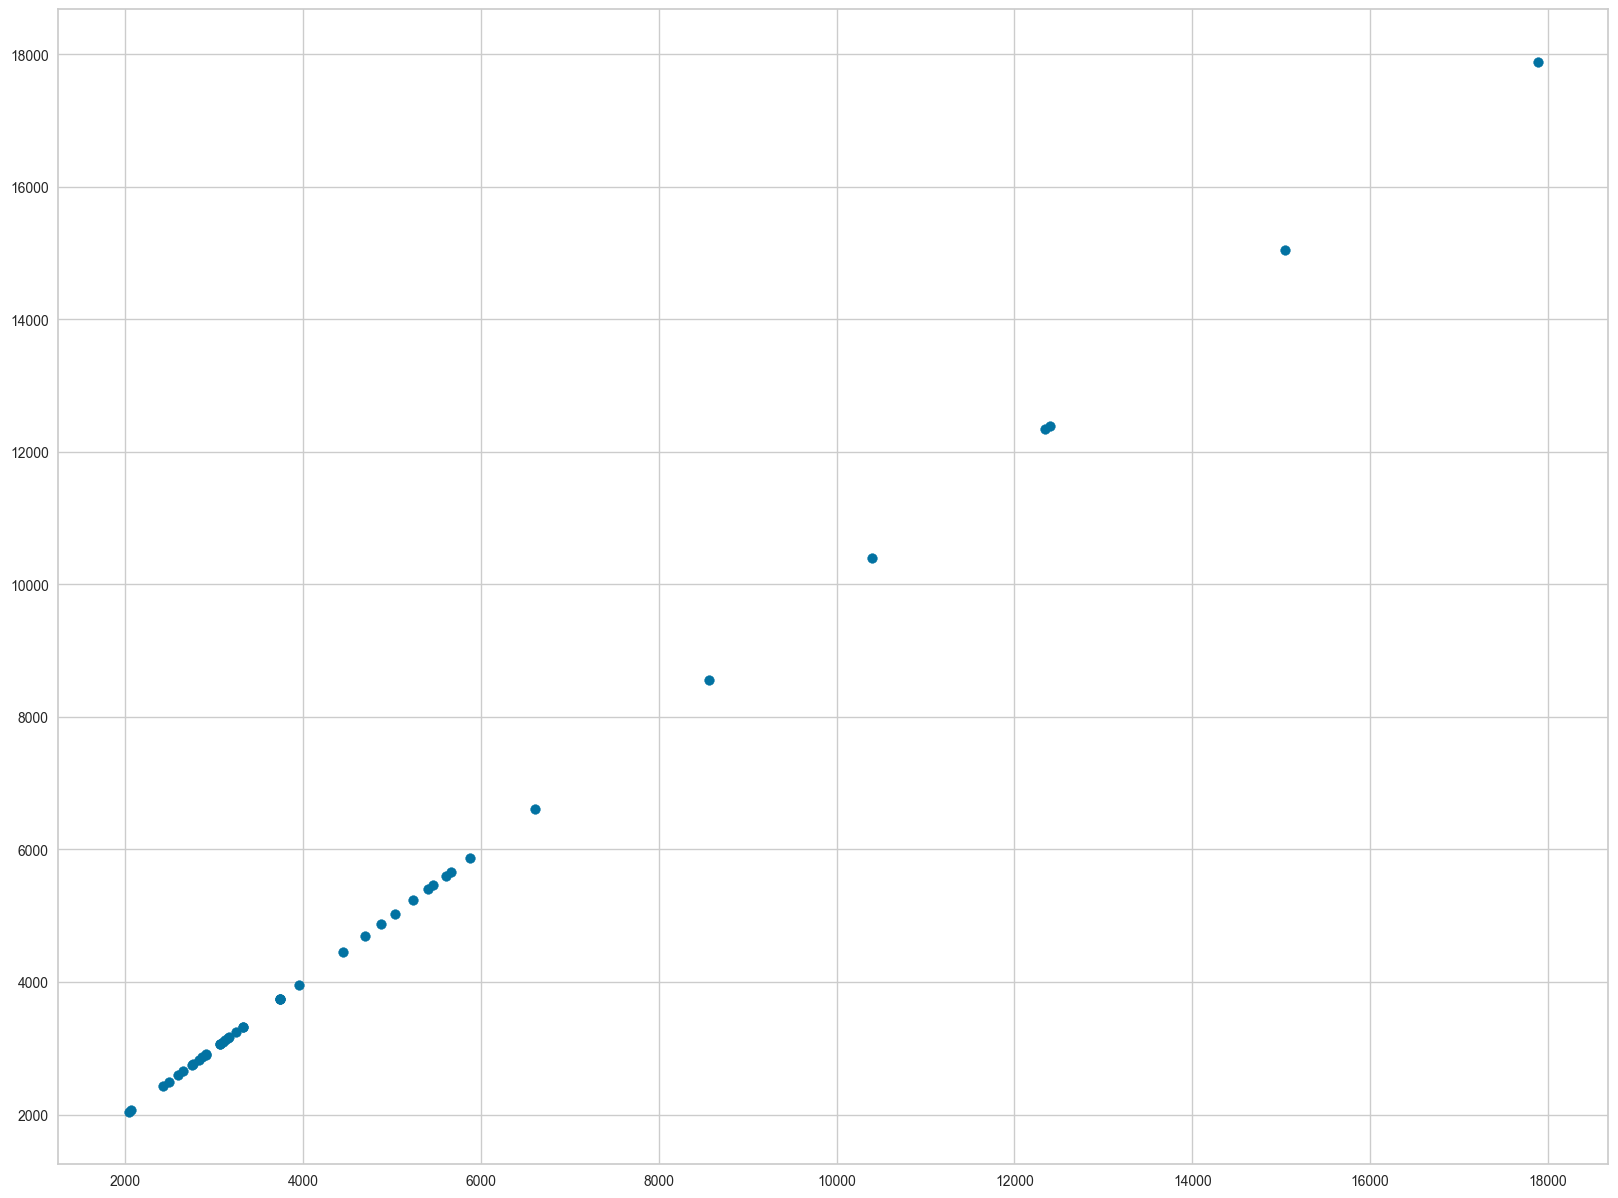

In [88]:
plt.scatter(y_test, predictions)

C:\Users\amren\AppData\Local\Temp\ipykernel_10344\3016481388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-predictions))


<Axes: xlabel='inr(10e3)', ylabel='Density'>

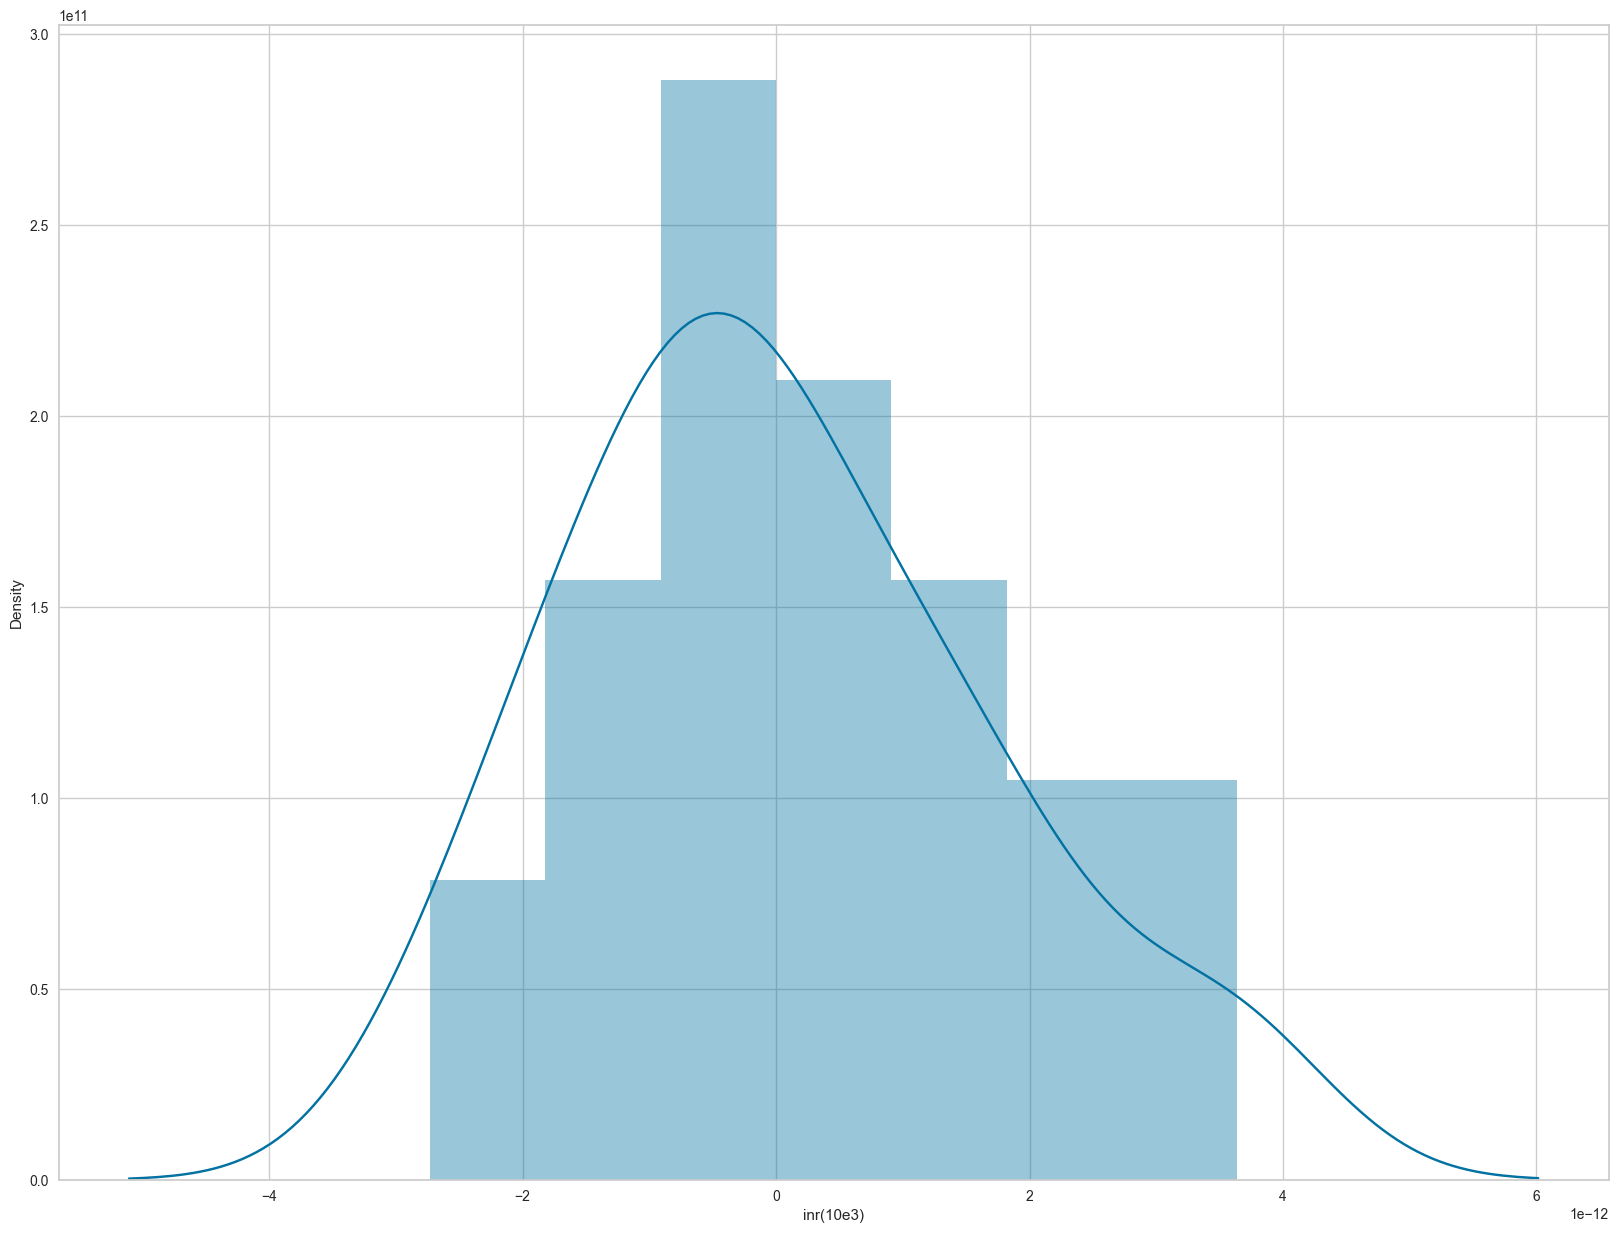

In [89]:
#Residual histogram plot
sb.distplot((y_test-predictions))

In [90]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.3101054632681466e-12
MSE: 2.732650237898395e-24
RMSE: 1.653072968110723e-12


In [91]:
metrics.mean_absolute_error(y_test,predictions)

1.3101054632681466e-12

In [92]:
metrics.mean_squared_error(y_test,predictions)

2.732650237898395e-24

In [93]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

np.float64(1.653072968110723e-12)